# Pandas 특징
- 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터를 쉽게 처리
- 크기 변이성(Size Mutability) : DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적(Explicit) 데이터 정렬 : 객체를 label 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위해 분할(Split), 적용(apply), 결합(Combine) 작업을 수행할 수 있는 강력하고 유연한 groupby 함수를 제공
- 누락된 Data 또는 다른 Python 및 Numpy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 객체로 쉽게 변환한다.
- 대용량 데이터 set의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
- 직관적인 Data Set 병합 및 결합
- Dat Set의 유연한 재구성 및 피벗
- 축의 계층적 Labeling(눈금 당 여러 개의 Label을 가질 수 있음)
- 플랫 파일(csv 및 구분), Excel 파일, database 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO 도구
- 시계열 특정 기능 : 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window) 통계, 날짜 이동 및 지연

In [188]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [189]:
pd.__version__

'1.3.4'

## Pandas 객체

In [190]:
# Series 객체

In [191]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [192]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [193]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [194]:
s[1]

0.25

In [195]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [196]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
             index = ['a', 'b', 'c', 'd', 'e'])

In [197]:
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [198]:
s['c']

0.5

In [199]:
s[['c', 'd', 'e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [200]:
'b' in s

True

In [201]:
0.25 in s

False

In [202]:
s[2:]

c    0.50
d    0.75
e    1.00
dtype: float64

In [203]:
0.25 in s.values

True

In [204]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [205]:
s.value_counts()

0.00    1
0.25    1
0.50    1
0.75    1
1.00    1
dtype: int64

In [206]:
s.isin([0.25, 0.75])

a    False
b     True
c    False
d     True
e    False
dtype: bool

In [207]:
pop_tuple = {'서울' : 9720846, '부산' : 3404423, '인천' : 2947217, '대구' : 2427954, '대전' : 1471040, '광주' : 1455048}

In [208]:
population = pd.Series(pop_tuple)

In [209]:
population

서울    9720846
부산    3404423
인천    2947217
대구    2427954
대전    1471040
광주    1455048
dtype: int64

In [210]:
population.index

Index(['서울', '부산', '인천', '대구', '대전', '광주'], dtype='object')

In [211]:
population.values

array([9720846, 3404423, 2947217, 2427954, 1471040, 1455048], dtype=int64)

In [212]:
population['서울']

9720846

In [213]:
population[['서울', '광주']]

서울    9720846
광주    1455048
dtype: int64

In [214]:
# DataFrame 객체

In [215]:
pd.DataFrame([{'A' : 2, 'B' : 4, 'D' : 3}, {'A' : 4, 'B' : 5, 'C' : 7}])

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [216]:
pd.DataFrame(np.random.rand(5,5),
            columns = ['a', 'b', 'c', 'd', 'e'],
            index = [1, 2, 3, 4, 5])

,a,b,c,d,e
1,0.915346,0.754898,0.529922,0.175681,0.991212
2,0.521049,0.059184,0.688876,0.354090,0.055723
3,0.786321,0.738683,0.103197,0.508168,0.259275
4,0.180720,0.206589,0.712234,0.498132,0.927335
5,0.112200,0.420853,0.703337,0.708208,0.128754


In [217]:
male_tuple = {'서울' : 4732275, '부산' : 1668618, '인천' : 1476813, '대구' : 1198815, '대전' : 734441, '광주' : 720060}
male = pd.Series(male_tuple)
male

서울    4732275
부산    1668618
인천    1476813
대구    1198815
대전     734441
광주     720060
dtype: int64

In [218]:
female_tuple = {'서울' : 4988571, '부산' : 1735805, '인천' : 1470404, '대구' : 1229139, '대전' : 736599, '광주' : 734988}
female = pd.Series(female_tuple)
female

서울    4988571
부산    1735805
인천    1470404
대구    1229139
대전     736599
광주     734988
dtype: int64

In [219]:
korea_df = pd.DataFrame({'인구수' : population, '남자 인구수' : male, '여자 인구수' : female})
korea_df

,인구수,남자 인구수,여자 인구수
서울,9720846,4732275,4988571
부산,3404423,1668618,1735805
인천,2947217,1476813,1470404
대구,2427954,1198815,1229139
대전,1471040,734441,736599
광주,1455048,720060,734988


In [220]:
korea_df.index

Index(['서울', '부산', '인천', '대구', '대전', '광주'], dtype='object')

In [221]:
korea_df.columns

Index(['인구수', '남자 인구수', '여자 인구수'], dtype='object')

In [222]:
korea_df['여자 인구수']

서울    4988571
부산    1735805
인천    1470404
대구    1229139
대전     736599
광주     734988
Name: 여자 인구수, dtype: int64

In [223]:
korea_df['서울' : '인천']

,인구수,남자 인구수,여자 인구수
서울,9720846,4732275,4988571
부산,3404423,1668618,1735805
인천,2947217,1476813,1470404


## Index 객체

Class      설명
- Index : 일반적인 index 객체이며, Numpy 배열 형식으로 축의 이름 표현
- Int64Index : 정수 값을 위한 index
- MultiIndex : 단일 축에 여러 단계 색인을 표현하는 계층적 Index 객체 (Tuple의 배열과 유사)
- DatetimeIndex : Numpy의 datetime64 타입으로 timestamp 저장
- PeriodIndex : 기간 데이터를 위한 index

In [224]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [225]:
idx[1]

4

In [226]:
idx[1:2]

Int64Index([4], dtype='int64')

In [227]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [228]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


## Index 연산
|연산자|method|설명|
|-----|-----|-----|
||append|색인 객체를 추가한 새로운 색인 반환|
|'-'|difference|색인의 차집합 반환|
|'&'|intersection|색인의 교집합 반환|
|\||union|색인의 합집합 반환|
||isin|색인이 존재하는지 여부를 Boolean Array로 반환|
||delete|색인이 삭제된 새로운 색인 반환|
||drop|값이 삭제된 새로운 색인 반환|
||insert|색인이 추가된 새로운 색인 반환|
||is_monotonic|색인이 단조성을 가지면 True|
||is_unique|중복되는 색인이 없다면 True|
||unique|색인에서 중복되는 요소를 제거하고 유일한 값만 반환|

In [229]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
# try append method
print(idx1.append(idx2))

# try difference method
print(idx1.difference(idx2))
print(idx1 - idx2)

# try intersection method
print(idx1.intersection(idx2))
print(idx1 & idx2)

# try union method
print(idx1.union(idx2))
print(idx1 | idx2)

# try delete method
print(idx1.delete(0))
print(idx1)

# try drop method
print(idx1.drop(1))

# try 여집합
print(idx1 ^ idx2)


Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


C:\Users\user\AppData\Local\Temp/ipykernel_14268/3164904411.py:12: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(idx1 & idx2)
C:\Users\user\AppData\Local\Temp/ipykernel_14268/3164904411.py:16: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  print(idx1 | idx2)
C:\Users\user\AppData\Local\Temp/ipykernel_14268/3164904411.py:26: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  print(idx1 ^ idx2)


# Indexing

In [230]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1], 
             index = ['a', 'b', 'c', 'd', 'e'])

In [231]:
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [232]:
s['b']

0.25

In [233]:
'b' in s

True

In [234]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [235]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [236]:
s.items()

In [237]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [238]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [239]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [240]:
s['a' : 'c']

a    0.00
b    0.25
c    0.50
dtype: float64

In [241]:
s[:3]

a    0.00
b    0.25
c    0.50
dtype: float64

In [242]:
s[(s > 0.4)]

c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [243]:
s[(s > 0.4) & (s < 1.0)]

c    0.50
d    0.75
dtype: float64

In [244]:
s[['a', 'b', 'c']]

a    0.00
b    0.25
c    0.50
dtype: float64

## Series Indexing

In [245]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
             index = [1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [246]:
s[1]

'a'

In [247]:
s[2 : 4]

5    c
7    d
dtype: object

In [248]:
# iloc은 data의 순서로 접근한다.
s.iloc[1]

'b'

In [249]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [250]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [251]:
# reindex를 하는데 NaN을 전 값으로 채우는 방식으로 결측치 처리
s.reindex(range(10), method = 'bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

## DataFrame Indexing
|사용방법|설명|
|-----|-----|
|df[val]|하나의 Column 혹은 여러 Column을 선택|
|df.loc[val]|label 값으로 row의 부분집합 선택|
|df.loc[:, val]|label 값으로 column의 부분집합 선택|
|df.loc[val1, val2]|label 값으로 row, column의 부분집합 선택|
|df.iloc[where]|정수 색인으로 row의 부분집합 선택|
|df.iloc[:, where]|정수 색인으로 column의 부분집합 선택|
|df.iloc[where_i, where_j]|정수 색인으로 row, column 부분집합 선택|
|df.at[label_i, label_j]|row, column의 label로 단일 값 선택|
|df.iat[i, j]|row, column의 정수 색인으로 단일값 선택|
|reindex|하나 이상의 축을 새로운 색인으로 재색인|
|get_value, set_value|row, column의 이름으로 값 선택|

In [252]:
s = pd.Series([1, 2, 3, 4, 5],
             index = [1, 2, 4, 5, 3])
s

1    1
2    2
4    3
5    4
3    5
dtype: int64

In [253]:
# loc의 경우 index의 label값으로 값을 찾아 index 이름이 3에 해당하는 값인 5를 선택하는 것을 볼 수 있다.
s.loc[3]

5

In [254]:
# iloc의 경우 정수 색인(where)로 값을 찾기에 3번째 위치에 해당하는 값인 4를 선택하는 것을 볼 수 있다.
s.iloc[3]

4

In [255]:
s.at[3]

5

In [256]:
s.iat[3]

4

In [257]:
korea_df

,인구수,남자 인구수,여자 인구수
서울,9720846,4732275,4988571
부산,3404423,1668618,1735805
인천,2947217,1476813,1470404
대구,2427954,1198815,1229139
대전,1471040,734441,736599
광주,1455048,720060,734988


In [258]:
korea_df['남자 인구수']

서울    4732275
부산    1668618
인천    1476813
대구    1198815
대전     734441
광주     720060
Name: 남자 인구수, dtype: int64

In [259]:
type(korea_df['남자 인구수'])

pandas.core.series.Series

In [260]:
korea_df['남녀 성비'] = korea_df['남자 인구수'] / korea_df['여자 인구수'] * 100

In [261]:
korea_df

,인구수,남자 인구수,여자 인구수,남녀 성비
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346
인천,2947217,1476813,1470404,100.435867
대구,2427954,1198815,1229139,97.532907
대전,1471040,734441,736599,99.707032
광주,1455048,720060,734988,97.968946


In [262]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [263]:
korea_df.T

,서울,부산,인천,대구,대전,광주
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자 인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자 인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남녀 성비,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [264]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [265]:
# practice slicing in dataframe
korea_df

,인구수,남자 인구수,여자 인구수,남녀 성비
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346
인천,2947217,1476813,1470404,100.435867
대구,2427954,1198815,1229139,97.532907
대전,1471040,734441,736599,99.707032
광주,1455048,720060,734988,97.968946


In [266]:
korea_df.loc['부산':'대구', '남자 인구수':'여자 인구수']

,남자 인구수,여자 인구수
부산,1668618,1735805
인천,1476813,1470404
대구,1198815,1229139


In [267]:
korea_df.iloc[1:4, 1:3]

,남자 인구수,여자 인구수
부산,1668618,1735805
인천,1476813,1470404
대구,1198815,1229139


In [268]:
korea_df['여자 인구수'] > 1000000

서울     True
부산     True
인천     True
대구     True
대전    False
광주    False
Name: 여자 인구수, dtype: bool

In [269]:
korea_df.loc[(korea_df['여자 인구수'] > 1000000)]

,인구수,남자 인구수,여자 인구수,남녀 성비
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346
인천,2947217,1476813,1470404,100.435867
대구,2427954,1198815,1229139,97.532907


In [270]:
korea_df.loc[(korea_df['인구수'] < 2000000)]

,인구수,남자 인구수,여자 인구수,남녀 성비
대전,1471040,734441,736599,99.707032
광주,1455048,720060,734988,97.968946


In [271]:
korea_df.loc[korea_df['남녀 성비'] > 100]

,인구수,남자 인구수,여자 인구수,남녀 성비
인천,2947217,1476813,1470404,100.435867


In [272]:
korea_df.iloc[korea_df['남녀 성비'] > 100]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [273]:
korea_df.loc[(korea_df['인구수'] > 2500000) & (korea_df['남녀 성비'] < 100)]

,인구수,남자 인구수,여자 인구수,남녀 성비
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346


## Multi Indexing
- 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리를 위함
- 단일 인덱스 내에 여러 index를 포함하는 다중 indexing

In [274]:
# 다중 index Series

In [275]:
korea_df

,인구수,남자 인구수,여자 인구수,남녀 성비
서울,9720846,4732275,4988571,94.862336
부산,3404423,1668618,1735805,96.129346
인천,2947217,1476813,1470404,100.435867
대구,2427954,1198815,1229139,97.532907
대전,1471040,734441,736599,99.707032
광주,1455048,720060,734988,97.968946


In [276]:
idx_tuples = [('서울', 2010), ('서울', 2020),
             ('부산', 2010), ('부산', 2020),
             ('인천', 2010), ('인천', 2020),
             ('대구', 2010), ('대구', 2020),
             ('대전', 2010), ('대전', 2020),
             ('광주', 2010), ('광주', 2020),]
idx_tuples

[('서울', 2010),
 ('서울', 2020),
 ('부산', 2010),
 ('부산', 2020),
 ('인천', 2010),
 ('인천', 2020),
 ('대구', 2010),
 ('대구', 2020),
 ('대전', 2010),
 ('대전', 2020),
 ('광주', 2010),
 ('광주', 2020)]

In [277]:
pop_tuples = [10312545,9720846,
             3567910,3404423,
             2758296,2947217,
             2511676,2427954,
             1503664,1471040,
             1454636,1455048]
population = pd.Series(pop_tuples, index = idx_tuples)

In [278]:
# 아래처럼 출력되는 내용은 multi index가 아님.
population

(서울, 2010)    10312545
(서울, 2020)     9720846
(부산, 2010)     3567910
(부산, 2020)     3404423
(인천, 2010)     2758296
(인천, 2020)     2947217
(대구, 2010)     2511676
(대구, 2020)     2427954
(대전, 2010)     1503664
(대전, 2020)     1471040
(광주, 2010)     1454636
(광주, 2020)     1455048
dtype: int64

In [279]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울', 2010),
            ('서울', 2020),
            ('부산', 2010),
            ('부산', 2020),
            ('인천', 2010),
            ('인천', 2020),
            ('대구', 2010),
            ('대구', 2020),
            ('대전', 2010),
            ('대전', 2020),
            ('광주', 2010),
            ('광주', 2020)],
           )

In [280]:
# 올바른 multi index의 예제
population = population.reindex(midx)
population

서울  2010    10312545
    2020     9720846
부산  2010     3567910
    2020     3404423
인천  2010     2758296
    2020     2947217
대구  2010     2511676
    2020     2427954
대전  2010     1503664
    2020     1471040
광주  2010     1454636
    2020     1455048
dtype: int64

In [281]:
population[:, 2010]

서울    10312545
부산     3567910
인천     2758296
대구     2511676
대전     1503664
광주     1454636
dtype: int64

In [282]:
population['대전', :]

2010    1503664
2020    1471040
dtype: int64

In [283]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주,1454636,1455048
대구,2511676,2427954
대전,1503664,1471040
부산,3567910,3404423
서울,10312545,9720846
인천,2758296,2947217


In [284]:
korea_mdf.stack()

광주  2010     1454636
    2020     1455048
대구  2010     2511676
    2020     2427954
대전  2010     1503664
    2020     1471040
부산  2010     3567910
    2020     3404423
서울  2010    10312545
    2020     9720846
인천  2010     2758296
    2020     2947217
dtype: int64

In [285]:
male_tuple = [5111259, 4732275,
             1773170, 1668618,
             1390356, 1476813,
             1255245, 1198815,
             753648, 734441,
             721780, 720060]
male_tuple

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [286]:
korea_mdf = pd.DataFrame({'총인구수' : pop_tuples,
                         '남자인구수' : male_tuple},
                        index = midx)

In [287]:
korea_mdf

총인구수    남자인구수
서울 2010  10312545  5111259
   2020   9720846  4732275
부산 2010   3567910  1773170
   2020   3404423  1668618
인천 2010   2758296  1390356
   2020   2947217  1476813
대구 2010   2511676  1255245
   2020   2427954  1198815
대전 2010   1503664   753648
   2020   1471040   734441
광주 2010   1454636   721780
   2020   1455048   720060

In [288]:
female_tuples = [5201286,4988571,
                1794740,1735805,
                1367940,1470404,
                1256431,1229139,
                750016,736599,
                732856,734988]
korea_mdf['여자인구수'] = female_tuples

In [289]:
korea_mdf

총인구수    남자인구수    여자인구수
서울 2010  10312545  5111259  5201286
   2020   9720846  4732275  4988571
부산 2010   3567910  1773170  1794740
   2020   3404423  1668618  1735805
인천 2010   2758296  1390356  1367940
   2020   2947217  1476813  1470404
대구 2010   2511676  1255245  1256431
   2020   2427954  1198815  1229139
대전 2010   1503664   753648   750016
   2020   1471040   734441   736599
광주 2010   1454636   721780   732856
   2020   1455048   720060   734988

In [290]:
korea_mdf['남녀성비'] = korea_mdf['남자인구수'] / korea_mdf['여자인구수'] * 100

In [291]:
korea_mdf

총인구수    남자인구수    여자인구수        남녀성비
서울 2010  10312545  5111259  5201286   98.269140
   2020   9720846  4732275  4988571   94.862336
부산 2010   3567910  1773170  1794740   98.798155
   2020   3404423  1668618  1735805   96.129346
인천 2010   2758296  1390356  1367940  101.638668
   2020   2947217  1476813  1470404  100.435867
대구 2010   2511676  1255245  1256431   99.905606
   2020   2427954  1198815  1229139   97.532907
대전 2010   1503664   753648   750016  100.484256
   2020   1471040   734441   736599   99.707032
광주 2010   1454636   721780   732856   98.488653
   2020   1455048   720060   734988   97.968946

In [292]:
# 다중 인덱스 생성 방법들

In [293]:
df = pd.DataFrame(np.random.rand(6, 3),
                 index = [['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]],
                 columns = ['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.331756  0.704408  0.905883
  2  0.504985  0.878564  0.630010
b 1  0.790121  0.113856  0.864523
  2  0.264796  0.463291  0.756228
c 1  0.105007  0.570026  0.928182
  2  0.394196  0.506896  0.670045

In [294]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [295]:
idx_tuples = [('a', 1), ('a', 2),
             ('b', 1), ('b', 2),
             ('c', 1), ('c', 2)]
pd.MultiIndex.from_tuples(idx_tuples)

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [296]:
pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [297]:
pd.MultiIndex(levels = [['a', 'b', 'c'], [1, 2]],
             codes = [[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [298]:
population.index.names = ['행정구역', '년도']

In [299]:
population

행정구역  년도  
서울    2010    10312545
      2020     9720846
부산    2010     3567910
      2020     3404423
인천    2010     2758296
      2020     2947217
대구    2010     2511676
      2020     2427954
대전    2010     1503664
      2020     1471040
광주    2010     1454636
      2020     1455048
dtype: int64

In [300]:
idx = pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]],
                                names = ['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1, 2]],
                                 names = ['col_name1', 'col_name2'])

data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data,
                  index = idx,
                  columns = cols)

In [301]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.71  1.40 -0.42  0.71 -0.83 -0.41
      2      0.68 -1.24  2.24 -1.87 -0.64 -0.01
b     1     -1.05  0.24  0.40 -0.80  0.62 -1.64
      2      0.14  0.87 -1.88  0.51 -0.90 -0.31
c     1     -0.77 -1.91 -1.67 -0.27 -0.83 -0.10
      2      1.15  2.05  1.01 -0.82  0.56 -0.44

In [302]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1     -0.42  0.71
      2      2.24 -1.87
b     1      0.40 -0.80
      2     -1.88  0.51
c     1     -1.67 -0.27
      2      1.01 -0.82

In [303]:
# Indexing and Slicing

In [304]:
population

행정구역  년도  
서울    2010    10312545
      2020     9720846
부산    2010     3567910
      2020     3404423
인천    2010     2758296
      2020     2947217
대구    2010     2511676
      2020     2427954
대전    2010     1503664
      2020     1471040
광주    2010     1454636
      2020     1455048
dtype: int64

In [305]:
population['인천', 2010]

2758296

In [306]:
population[:, 2010]

행정구역
서울    10312545
부산     3567910
인천     2758296
대구     2511676
대전     1503664
광주     1454636
dtype: int64

In [307]:
population[population > 3000000]

행정구역  년도  
서울    2010    10312545
      2020     9720846
부산    2010     3567910
      2020     3404423
dtype: int64

In [308]:
population[['대구','대전']]

행정구역  년도  
대구    2010    2511676
      2020    2427954
대전    2010    1503664
      2020    1471040
dtype: int64

In [309]:
mdf['c2', 1]

name1  name2
a      1       -0.42
       2        2.24
b      1        0.40
       2       -1.88
c      1       -1.67
       2        1.01
Name: (c2, 1), dtype: float64

In [310]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,-1.24,-1.87,-0.01
b,2,0.87,0.51,-0.31
c,2,2.05,-0.82,-0.44


In [311]:
# 다중 인덱스 재정렬

In [312]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1      0.71  1.40 -0.42  0.71 -0.83 -0.41
      2      0.68 -1.24  2.24 -1.87 -0.64 -0.01
b     1     -1.05  0.24  0.40 -0.80  0.62 -1.64
      2      0.14  0.87 -1.88  0.51 -0.90 -0.31
c     1     -0.77 -1.91 -1.67 -0.27 -0.83 -0.10
      2      1.15  2.05  1.01 -0.82  0.56 -0.44

In [313]:
korea_mdf

총인구수    남자인구수    여자인구수        남녀성비
행정구역 년도                                          
서울   2010  10312545  5111259  5201286   98.269140
     2020   9720846  4732275  4988571   94.862336
부산   2010   3567910  1773170  1794740   98.798155
     2020   3404423  1668618  1735805   96.129346
인천   2010   2758296  1390356  1367940  101.638668
     2020   2947217  1476813  1470404  100.435867
대구   2010   2511676  1255245  1256431   99.905606
     2020   2427954  1198815  1229139   97.532907
대전   2010   1503664   753648   750016  100.484256
     2020   1471040   734441   736599   99.707032
광주   2010   1454636   721780   732856   98.488653
     2020   1455048   720060   734988   97.968946

In [314]:
korea_mdf['서울' : '대전']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [315]:
korea_mdf = korea_mdf.sort_index()

In [316]:
korea_mdf

총인구수    남자인구수    여자인구수        남녀성비
행정구역 년도                                          
광주   2010   1454636   721780   732856   98.488653
     2020   1455048   720060   734988   97.968946
대구   2010   2511676  1255245  1256431   99.905606
     2020   2427954  1198815  1229139   97.532907
대전   2010   1503664   753648   750016  100.484256
     2020   1471040   734441   736599   99.707032
부산   2010   3567910  1773170  1794740   98.798155
     2020   3404423  1668618  1735805   96.129346
서울   2010  10312545  5111259  5201286   98.269140
     2020   9720846  4732275  4988571   94.862336
인천   2010   2758296  1390356  1367940  101.638668
     2020   2947217  1476813  1470404  100.435867

In [317]:
korea_mdf['광주' : '서울']

총인구수    남자인구수    여자인구수        남녀성비
행정구역 년도                                          
광주   2010   1454636   721780   732856   98.488653
     2020   1455048   720060   734988   97.968946
대구   2010   2511676  1255245  1256431   99.905606
     2020   2427954  1198815  1229139   97.532907
대전   2010   1503664   753648   750016  100.484256
     2020   1471040   734441   736599   99.707032
부산   2010   3567910  1773170  1794740   98.798155
     2020   3404423  1668618  1735805   96.129346
서울   2010  10312545  5111259  5201286   98.269140
     2020   9720846  4732275  4988571   94.862336

In [318]:
korea_mdf.unstack(level = 0)

총인구수                                                 남자인구수           \
행정구역       광주       대구       대전       부산        서울       인천      광주       대구   
년도                                                                             
2010  1454636  2511676  1503664  3567910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...   여자인구수                                  남녀성비  \
행정구역      대전       부산  ...      대전       부산       서울       인천         광주   
년도                     ...                                                 
2010  753648  1773170  ...  750016  1794740  5201286  1367940  98.488653   
2020  734441  1668618  ...  736599  1735805  4988571  1470404  97.968946   

                                                               
행정구역         대구          대전         부산         서울          인천  
년도                                                             
2010  99.905606  100.484256  98.798155  98.269140  101.638668  
2020  97.532907   99.707032  96.129346  94.862336  100.435867  

[2 rows x 24 columns]

In [319]:
korea_mdf.unstack(level = 1)

총인구수             남자인구수             여자인구수                 남녀성비  \
년도        2010     2020     2010     2020     2010     2020        2010   
행정구역                                                                      
광주     1454636  1455048   721780   720060   732856   734988   98.488653   
대구     2511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전     1503664  1471040   753648   734441   750016   736599  100.484256   
부산     3567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울    10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천     2758296  2947217  1390356  1476813  1367940  1470404  101.638668   

                  
년도          2020  
행정구역              
광주     97.968946  
대구     97.532907  
대전     99.707032  
부산     96.129346  
서울     94.862336  
인천    100.435867

In [320]:
korea_mdf.stack()

행정구역  년도         
광주    2010  총인구수     1.454636e+06
            남자인구수    7.217800e+05
            여자인구수    7.328560e+05
            남녀성비     9.848865e+01
      2020  총인구수     1.455048e+06
            남자인구수    7.200600e+05
            여자인구수    7.349880e+05
            남녀성비     9.796895e+01
대구    2010  총인구수     2.511676e+06
            남자인구수    1.255245e+06
            여자인구수    1.256431e+06
            남녀성비     9.990561e+01
      2020  총인구수     2.427954e+06
            남자인구수    1.198815e+06
            여자인구수    1.229139e+06
            남녀성비     9.753291e+01
대전    2010  총인구수     1.503664e+06
            남자인구수    7.536480e+05
            여자인구수    7.500160e+05
            남녀성비     1.004843e+02
      2020  총인구수     1.471040e+06
            남자인구수    7.344410e+05
            여자인구수    7.365990e+05
            남녀성비     9.970703e+01
부산    2010  총인구수     3.567910e+06
            남자인구수    1.773170e+06
            여자인구수    1.794740e+06
            남녀성비     9.879815e+01
      2020  총인구수     3.404423e

In [321]:
korea_mdf

총인구수    남자인구수    여자인구수        남녀성비
행정구역 년도                                          
광주   2010   1454636   721780   732856   98.488653
     2020   1455048   720060   734988   97.968946
대구   2010   2511676  1255245  1256431   99.905606
     2020   2427954  1198815  1229139   97.532907
대전   2010   1503664   753648   750016  100.484256
     2020   1471040   734441   736599   99.707032
부산   2010   3567910  1773170  1794740   98.798155
     2020   3404423  1668618  1735805   96.129346
서울   2010  10312545  5111259  5201286   98.269140
     2020   9720846  4732275  4988571   94.862336
인천   2010   2758296  1390356  1367940  101.638668
     2020   2947217  1476813  1470404  100.435867

In [322]:
idx_flat = korea_mdf.reset_index(level = 0)

In [323]:
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남녀성비
년도,,,,,
2010,광주,1454636,721780,732856,98.488653
2020,광주,1455048,720060,734988,97.968946
2010,대구,2511676,1255245,1256431,99.905606
2020,대구,2427954,1198815,1229139,97.532907
2010,대전,1503664,753648,750016,100.484256
2020,대전,1471040,734441,736599,99.707032
2010,부산,3567910,1773170,1794740,98.798155
2020,부산,3404423,1668618,1735805,96.129346
2010,서울,10312545,5111259,5201286,98.269140


In [330]:
idx_flat = korea_mdf.reset_index(level = [0, 1])
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남녀성비
0,광주,2010,1454636,721780,732856,98.488653
1,광주,2020,1455048,720060,734988,97.968946
2,대구,2010,2511676,1255245,1256431,99.905606
3,대구,2020,2427954,1198815,1229139,97.532907
4,대전,2010,1503664,753648,750016,100.484256
5,대전,2020,1471040,734441,736599,99.707032
6,부산,2010,3567910,1773170,1794740,98.798155
7,부산,2020,3404423,1668618,1735805,96.129346
8,서울,2010,10312545,5111259,5201286,98.269140
9,서울,2020,9720846,4732275,4988571,94.862336


In [331]:
idx_flat = idx_flat.set_index(['행정구역', '년도'])

In [332]:
idx_flat

총인구수    남자인구수    여자인구수        남녀성비
행정구역 년도                                          
광주   2010   1454636   721780   732856   98.488653
     2020   1455048   720060   734988   97.968946
대구   2010   2511676  1255245  1256431   99.905606
     2020   2427954  1198815  1229139   97.532907
대전   2010   1503664   753648   750016  100.484256
     2020   1471040   734441   736599   99.707032
부산   2010   3567910  1773170  1794740   98.798155
     2020   3404423  1668618  1735805   96.129346
서울   2010  10312545  5111259  5201286   98.269140
     2020   9720846  4732275  4988571   94.862336
인천   2010   2758296  1390356  1367940  101.638668
     2020   2947217  1476813  1470404  100.435867

# Data 연산

In [333]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    8
1    0
2    4
3    4
4    7
dtype: int32

In [335]:
df = pd.DataFrame(np.random.randint(0, 10, (3,3)),
                 columns = ['a', 'b', 'c'])
df

,a,b,c
0,7,3,9
1,5,1,9
2,3,7,6


In [336]:
np.exp(s)

0    2980.957987
1       1.000000
2      54.598150
3      54.598150
4    1096.633158
dtype: float64

In [337]:
np.cos(s)

0   -0.145500
1    1.000000
2   -0.653644
3   -0.653644
4    0.753902
dtype: float64

In [338]:
np.cos(df * np.pi / 4)

,a,b,c
0,0.707107,-0.707107,7.071068e-01
1,-0.707107,0.707107,7.071068e-01
2,-0.707107,0.707107,-1.836970e-16


In [339]:
s1 = pd.Series([1, 3, 5, 7, 9], index = [0, 1, 2, 3, 4])
s2 = pd.Series([2, 3, 4, 5, 6], index = [1, 2, 3, 4, 5])

# operation의 기준은 index이기에 일치하지 않는 index는 NaN 결측치로 남는 것을 확인할 수 있다.
s1 + s2

0     NaN
1     5.0
2     8.0
3    11.0
4    14.0
5     NaN
dtype: float64

In [341]:
s1.add(s2, fill_value = 0)
# 일치하지 않는 index의 값을 fill value 0으로 채워주는 option

0     1.0
1     5.0
2     8.0
3    11.0
4    14.0
5     6.0
dtype: float64

In [343]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3, 3)),
                  columns = ['a', 'c', 'd'])

df2 = pd.DataFrame(np.random.randint(0, 20, (5,5)),
                  columns = ['b', 'a', 'e', 'c', 'd'])

In [344]:
df1

,a,c,d
0,9,8,3
1,12,0,8
2,11,15,0


In [345]:
df2

,b,a,e,c,d
0,1,19,12,17,7
1,19,2,19,2,12
2,16,0,14,19,10
3,10,8,7,3,8
4,10,16,19,18,16


In [346]:
df1 + df2

,a,b,c,d,e
0,28.0,NaN,25.0,10.0,NaN
1,14.0,NaN,2.0,20.0,NaN
2,11.0,NaN,34.0,10.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [348]:
df1.add(df2, fill_value = 0)

,a,b,c,d,e
0,28.0,1.0,25.0,10.0,12.0
1,14.0,19.0,2.0,20.0,19.0
2,11.0,16.0,34.0,10.0,14.0
3,8.0,10.0,3.0,8.0,7.0
4,16.0,10.0,18.0,16.0,19.0


In [351]:
fvalue = df1.stack().mean()
df1.add(df2, fill_value = fvalue)

,a,b,c,d,e
0,28.000000,8.333333,25.000000,10.000000,19.333333
1,14.000000,26.333333,2.000000,20.000000,26.333333
2,11.000000,23.333333,34.000000,10.000000,21.333333
3,15.333333,17.333333,10.333333,15.333333,14.333333
4,23.333333,17.333333,25.333333,23.333333,26.333333


## 연산자 범용 함수
|Python 연산자|Pandas Method|
|-----|-----|
| + |add, radd|
| - |sub, rsub, subtract|
| * |mul, rmul, multiply|
| / |truediv, div, rdiv, divide|
| // |floordiv, rfloordiv|
| % | mod|
| ** | pow, rpow|


In [352]:
# add

In [398]:
a = np.random.randint(0, 20, (3, 3))
a

array([[18,  3,  3],
       [18,  6, 18],
       [ 1,  6, 16]])

In [399]:
a + a[0]

array([[36,  6,  6],
       [36,  9, 21],
       [19,  9, 19]])

In [400]:
df = pd.DataFrame(a,
                 columns = list('abc'))

In [401]:
df

,a,b,c
0,18,3,3
1,18,6,18
2,1,6,16


In [402]:
df + df.loc[0]

,a,b,c
0,36,6,6
1,36,9,21
2,19,9,19


In [403]:
df.add(df.loc[0])

,a,b,c
0,36,6,6
1,36,9,21
2,19,9,19


In [404]:
df.add(df.a, axis = 0)

,a,b,c
0,36,21,21
1,36,24,36
2,2,7,17


In [384]:
# sub / subtract()

In [385]:
a

array([[12, 15, 15],
       [ 6, 12,  4],
       [ 5,  4,  5]])

In [386]:
a - a[1]

array([[ 6,  3, 11],
       [ 0,  0,  0],
       [-1, -8,  1]])

In [387]:
df

,a,b,c
0,12,15,15
1,6,12,4
2,5,4,5


In [389]:
df - df.iloc[0]

,a,b,c
0,0,0,0
1,-6,-3,-11
2,-7,-11,-10


In [390]:
df.sub(df.iloc[0])

,a,b,c
0,0,0,0
1,-6,-3,-11
2,-7,-11,-10


In [396]:
df.sub(df['b'], axis = 0)

,a,b,c
0,-3,0,0
1,-6,0,-8
2,1,0,1


In [391]:
# mul() / multiply()

In [405]:
a = np.random.randint(0, 20, (3, 3))
a

array([[ 9,  0, 12],
       [ 2,  6,  3],
       [ 0, 16, 18]])

In [406]:
df = pd.DataFrame(a,
                 columns = ['a', 'b', 'c'])

In [407]:
df

,a,b,c
0,9,0,12
1,2,6,3
2,0,16,18


In [408]:
df.mul(df['a'], axis = 0)

,a,b,c
0,81,0,108
1,4,12,6
2,0,0,0


In [409]:
df.multiply(df.loc[0])

,a,b,c
0,81,0,144
1,18,0,36
2,0,0,216


In [410]:
# devide()

In [411]:
# mod()

In [412]:
# pow()

In [415]:
df

,a,b,c
0,9,0,12
1,2,6,3
2,0,16,18


In [416]:
df.pow(df.iloc[0])

,a,b,c
0,387420489,1,-251658240
1,512,1,531441
2,0,1,-879882240


In [417]:
df.pow(df.a, axis = 0)

,a,b,c
0,387420489,0,864813056
1,4,36,9
2,1,1,1


# 정렬(Sort)

In [420]:
s = pd.Series(range(5), index = ['a', 'd', 'c', 'b', 'e'])

In [421]:
s

a    0
d    1
c    2
b    3
e    4
dtype: int64

In [422]:
s.sort_index()

a    0
b    3
c    2
d    1
e    4
dtype: int64

In [424]:
s.sort_values()

a    0
d    1
c    2
b    3
e    4
dtype: int64

In [433]:
df = pd.DataFrame(np.random.randint(0, 20, (5,5)),
                 columns = ['b', 'd', 'c', 'e', 'a'],
                 index = [1, 4, 2, 3, 0])
df

,b,d,c,e,a
1,0,5,5,10,1
4,0,3,7,9,8
2,4,19,14,6,6
3,10,19,16,4,11
0,12,4,19,1,3


In [434]:
df.sort_index()

,b,d,c,e,a
0,12,4,19,1,3
1,0,5,5,10,1
2,4,19,14,6,6
3,10,19,16,4,11
4,0,3,7,9,8


In [437]:
df.sort_values(by = 'b')

,b,d,c,e,a
1,0,5,5,10,1
4,0,3,7,9,8
2,4,19,14,6,6
3,10,19,16,4,11
0,12,4,19,1,3


In [439]:
# 두가지 column의 값을 기준으로 정렬할 경우 아래와 같음.
# 우선순위는 먼저 list에 기재된 a가 c보다 우선한다.
df.sort_values(by = ['a', 'c'])

,b,d,c,e,a
1,0,5,5,10,1
0,12,4,19,1,3
2,4,19,14,6,6
4,0,3,7,9,8
3,10,19,16,4,11


In [441]:
# axis를 1로 설정해 준 결과 column name을 기준으로 정렬되는 것을 볼 수 있음
df.sort_index(axis = 1)

,a,b,c,d,e
1,1,0,5,5,10
4,8,0,7,3,9
2,6,4,14,19,6
3,11,10,16,19,4
0,3,12,19,4,1


# Ranking
|Method|설명|
|-----|-----|
|average|기본값, 순위에 같은 값을 가지는 항목들의 평균값을 사용|
|min|같은 값을 가지는 그룹을 낮은 순위로 지정|
|max|같은 값을 가지는 그룹을 높은 순위로 지정|
|first|data 내의 위치에 따라 순위 지정|
|dense|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [442]:
s = pd.Series(np.random.randint(0, 20, 10))
s

0    13
1    10
2    11
3    19
4    14
5     3
6    13
7     8
8    19
9     5
dtype: int32

In [444]:
s.rank()
# 해당 series에서 어떤 값이 가장 낮은지 순서로 ranking을 보여줌

0    6.5
1    4.0
2    5.0
3    9.5
4    8.0
5    1.0
6    6.5
7    3.0
8    9.5
9    2.0
dtype: float64

In [446]:
s.rank(method = 'first')
# 동일한 값이 나왔을 때, 먼저 적혀져 있는 숫자가 순위가 더 높도록 ranking을 매기는 방식이다.

0     6.0
1     4.0
2     5.0
3     9.0
4     8.0
5     1.0
6     7.0
7     3.0
8    10.0
9     2.0
dtype: float64

In [448]:
s.rank(method = 'max')
# 9위가 사라지고 같은 값을 지니던 9, 10위 모두 10위로 기재되는 것을 확인가능

0     7.0
1     4.0
2     5.0
3    10.0
4     8.0
5     1.0
6     7.0
7     3.0
8    10.0
9     2.0
dtype: float64

# 고성능 연산
계산양이 큰 연산을 경우 pd.eval()을 사용하여 시간을 단축시킬 수 있다.

In [450]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [451]:
%timeit df1 + df2 + df3 + df4

54.7 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [452]:
%timeit pd.eval('df1 + df2 + df3 + df4')

26 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [453]:
%timeit df1 * -df2 / (-df3 * df4)

104 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [454]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

24.5 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [455]:
%timeit (df1 < df2) & (df3 <= df4) | (df3 != df2)

42.4 ms ± 697 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [456]:
%timeit pd.eval('(df1 < df2) & (df3 <= df4) | (df3 != df2)')

21.9 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [460]:
df = pd.DataFrame(np.random.rand(1000000, 5),
                 columns = list('abcde'))
df.head()

,a,b,c,d,e
0,0.741948,0.509766,0.294197,0.731206,0.835247
1,0.096835,0.571150,0.503731,0.567938,0.516076
2,0.429355,0.660831,0.961239,0.615055,0.827996
3,0.495699,0.571663,0.456312,0.633487,0.627307
4,0.691731,0.592553,0.078641,0.986048,0.371930


In [461]:
%timeit df['a'] + df['b'] * df['c'] / df['e']

10.8 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [463]:
%timeit pd.eval('df.a + df.b * df.c / df.e')

4.42 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [464]:
%timeit df.eval('a + b * c / e')

7.95 ms ± 92.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [465]:
df.eval('f = a + b * c / e')
df

,a,b,c,d,e
0,0.741948,0.509766,0.294197,0.731206,0.835247
1,0.096835,0.571150,0.503731,0.567938,0.516076
2,0.429355,0.660831,0.961239,0.615055,0.827996
3,0.495699,0.571663,0.456312,0.633487,0.627307
4,0.691731,0.592553,0.078641,0.986048,0.371930
...,...,...,...,...,...
999995,0.675610,0.029291,0.127677,0.068183,0.698140
999996,0.136965,0.288651,0.075595,0.720622,0.575138
999997,0.233860,0.113213,0.047701,0.364145,0.545904
999998,0.266397,0.418977,0.297558,0.832581,0.758775


In [469]:
# 외부에 있는 변수를 사용하여 pd.eval()을 사용하고자 하는 경우 -> @변수명
col_mean = df.mean(1)
df.eval('a + @col_mean')

0         1.364421
1         0.547980
2         1.128250
3         1.052593
4         1.235912
            ...   
999995    0.995390
999996    0.496359
999997    0.494825
999998    0.781254
999999    0.892803
Length: 1000000, dtype: float64

In [470]:
df.query('(a < 0.5) and (b < 0.5) and (c < 0.5)')

,a,b,c,d,e
8,0.232230,0.329674,0.173540,0.614251,0.857188
41,0.173746,0.398410,0.325299,0.900445,0.408857
53,0.080284,0.480777,0.179457,0.057534,0.525430
55,0.466854,0.130326,0.335082,0.097159,0.896087
70,0.445890,0.387077,0.255787,0.266587,0.566169
...,...,...,...,...,...
999962,0.311681,0.392763,0.379908,0.072951,0.506266
999966,0.125078,0.044572,0.175511,0.335169,0.503601
999996,0.136965,0.288651,0.075595,0.720622,0.575138
999997,0.233860,0.113213,0.047701,0.364145,0.545904


# Data 결합

## Concat() / Append()

In [471]:
s1 = pd.Series(['a', 'b'], index = [1, 2])
s2 = pd.Series(['c', 'd'], index = [3, 4])

pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [484]:
def create_df(cols, idx):
    data = {c : [str(c.lower()) + str(i) for i in idx] for c in cols}
    
    df = pd.DataFrame(data, index = idx)
    
    return df

In [485]:
col_df1 = list('abcdef')
idx_df1 = range(5)
df1 = create_df(col_df1, idx_df1)
df1

,a,b,c,d,e,f
0,a0,b0,c0,d0,e0,f0
1,a1,b1,c1,d1,e1,f1
2,a2,b2,c2,d2,e2,f2
3,a3,b3,c3,d3,e3,f3
4,a4,b4,c4,d4,e4,f4


In [488]:
df2 = create_df('abcdef', [5, 6, 7, 8])
df2

,a,b,c,d,e,f
5,a5,b5,c5,d5,e5,f5
6,a6,b6,c6,d6,e6,f6
7,a7,b7,c7,d7,e7,f7
8,a8,b8,c8,d8,e8,f8


In [489]:
pd.concat([df1, df2])

,a,b,c,d,e,f
0,a0,b0,c0,d0,e0,f0
1,a1,b1,c1,d1,e1,f1
2,a2,b2,c2,d2,e2,f2
3,a3,b3,c3,d3,e3,f3
4,a4,b4,c4,d4,e4,f4
5,a5,b5,c5,d5,e5,f5
6,a6,b6,c6,d6,e6,f6
7,a7,b7,c7,d7,e7,f7
8,a8,b8,c8,d8,e8,f8


In [491]:
df3 = create_df('AB', [0, 1, 2])
df3

,A,B
0,a0,b0
1,a1,b1
2,a2,b2


In [492]:
df4 = create_df('CD', [0, 1, 2])
df4

,C,D
0,c0,d0
1,c1,d1
2,c2,d2


In [496]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
2,a2,b2,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1
2,NaN,NaN,c2,d2


In [497]:
pd.concat([df3, df4], axis = 1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2


In [498]:
df5 = create_df('abcdef', range(5))
df5

,a,b,c,d,e,f
0,a0,b0,c0,d0,e0,f0
1,a1,b1,c1,d1,e1,f1
2,a2,b2,c2,d2,e2,f2
3,a3,b3,c3,d3,e3,f3
4,a4,b4,c4,d4,e4,f4


In [500]:
pd.concat([df1, df5], verify_integrity = True)
# index가 동일하기에 error 발생

ValueError: Indexes have overlapping values: Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [501]:
pd.concat([df1, df5], ignore_index = True)

,a,b,c,d,e,f
0,a0,b0,c0,d0,e0,f0
1,a1,b1,c1,d1,e1,f1
2,a2,b2,c2,d2,e2,f2
3,a3,b3,c3,d3,e3,f3
4,a4,b4,c4,d4,e4,f4
5,a0,b0,c0,d0,e0,f0
6,a1,b1,c1,d1,e1,f1
7,a2,b2,c2,d2,e2,f2
8,a3,b3,c3,d3,e3,f3
9,a4,b4,c4,d4,e4,f4


In [503]:
pd.concat([df1, df5])

,a,b,c,d,e,f
0,a0,b0,c0,d0,e0,f0
1,a1,b1,c1,d1,e1,f1
2,a2,b2,c2,d2,e2,f2
3,a3,b3,c3,d3,e3,f3
4,a4,b4,c4,d4,e4,f4
0,a0,b0,c0,d0,e0,f0
1,a1,b1,c1,d1,e1,f1
2,a2,b2,c2,d2,e2,f2
3,a3,b3,c3,d3,e3,f3
4,a4,b4,c4,d4,e4,f4


In [506]:
df6 = pd.concat([df1, df5], keys = ['key1', 'key2'])
df6

a   b   c   d   e   f
key1 0  a0  b0  c0  d0  e0  f0
     1  a1  b1  c1  d1  e1  f1
     2  a2  b2  c2  d2  e2  f2
     3  a3  b3  c3  d3  e3  f3
     4  a4  b4  c4  d4  e4  f4
key2 0  a0  b0  c0  d0  e0  f0
     1  a1  b1  c1  d1  e1  f1
     2  a2  b2  c2  d2  e2  f2
     3  a3  b3  c3  d3  e3  f3
     4  a4  b4  c4  d4  e4  f4

In [507]:
df6.index

MultiIndex([('key1', 0),
            ('key1', 1),
            ('key1', 2),
            ('key1', 3),
            ('key1', 4),
            ('key2', 0),
            ('key2', 1),
            ('key2', 2),
            ('key2', 3),
            ('key2', 4)],
           )

In [508]:
df7 = create_df('ABC', [1, 2])
df8 = create_df('BCD', [3, 4])

pd.concat([df7, df8])
# Column name B, C => 동일한 Column이 아닌 부분에서는 NaN이 있음을 확인

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [509]:
# B, C Column(동일하게 가지고 있는 column에서만 합치기를 하고 싶은 경우)
pd.concat([df7, df8], join = 'inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [510]:
pd.concat([df7, df8], join = 'outer')

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [511]:
df7.append(df8)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


## 병합과 조인

In [512]:
df1 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'], 
                   '학과' : ['경영학과', '교육학과', '컴퓨터학과', '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [515]:
df2 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '입학년도' : [2015, 2016, 2018, 2020]})
df2

,학생,입학년도
0,홍길동,2015
1,이순신,2016
2,임꺽정,2018
3,김유신,2020


In [517]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2015
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2018
3,김유신,통계학과,2020


In [518]:
df4 = pd.DataFrame({'학과' : ['경영학과', '교육학과', '컴퓨터학과', '통계학과'],
                   '학과장' : ['황희', '정약용', '안창호', '장영실']})

In [522]:
# merge시 공통되는 사항을 기준으로 merge가 된다. 위 경우는 학과가 기준임
df = pd.merge(df3, df4)
df

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2015,황희
1,이순신,교육학과,2016,정약용
2,임꺽정,컴퓨터학과,2018,안창호
3,김유신,통계학과,2020,장영실


In [523]:
df5 = pd.DataFrame({'학과' : ['경영학과', '교육학과', '교육학과','컴퓨터학과', '컴퓨터학과', '통계학과'],
                   '과목' : ['미시 경제학', '수학교육학', '청소년심리학', '프로그래밍기초및실습', '빅데이터 분석', '통계기초 및 가설검정']})
df5

,학과,과목
0,경영학과,미시 경제학
1,교육학과,수학교육학
2,교육학과,청소년심리학
3,컴퓨터학과,프로그래밍기초및실습
4,컴퓨터학과,빅데이터 분석
5,통계학과,통계기초 및 가설검정


In [524]:
pd.merge(df, df5)

,학생,학과,입학년도,학과장,과목
0,홍길동,경영학과,2015,황희,미시 경제학
1,이순신,교육학과,2016,정약용,수학교육학
2,이순신,교육학과,2016,정약용,청소년심리학
3,임꺽정,컴퓨터학과,2018,안창호,프로그래밍기초및실습
4,임꺽정,컴퓨터학과,2018,안창호,빅데이터 분석
5,김유신,통계학과,2020,장영실,통계기초 및 가설검정


In [525]:
df6 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정', '김유신'],
                   '성적' : ['A', 'B', 'A+', 'A']})
df6

,이름,성적
0,홍길동,A
1,이순신,B
2,임꺽정,A+
3,김유신,A


In [527]:
# df1과 df6를 merge하려고 하는 상황이다.
# 하지만 df1의 경우 학생들의 이름을 저장하는 column 명으로 '학생'을 사용하였고, df6에서는 '이름'이라는 column명을 사용하고 있다.
# 이를 merge하기 위해서 left_on, rigth_on을 사용한다.

pd.merge(df1, df6, left_on = '학생', right_on = '이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,B
2,임꺽정,컴퓨터학과,임꺽정,A+
3,김유신,통계학과,김유신,A


In [529]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름').drop('이름', axis = 1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,B
2,임꺽정,컴퓨터학과,A+
3,김유신,통계학과,A


In [530]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [531]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [532]:
mdf2

,입학년도
학생,
홍길동,2015
이순신,2016
임꺽정,2018
김유신,2020


In [533]:
pd.merge(mdf1, mdf2, left_index = True, right_index = True)

,학과,입학년도
학생,,
홍길동,경영학과,2015
이순신,교육학과,2016
임꺽정,컴퓨터학과,2018
김유신,통계학과,2020


In [534]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2015
이순신,교육학과,2016
임꺽정,컴퓨터학과,2018
김유신,통계학과,2020


In [535]:
pd.merge(mdf1, df6, left_index = True, right_on = '이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,B
2,컴퓨터학과,임꺽정,A+
3,통계학과,김유신,A


In [536]:
df7 = pd.DataFrame({'이름' : ['임꺽정', '홍길동', '이순신'],
                   '주문음식' : ['갈비', '햄버거', '치킨']})

df8 = pd.DataFrame({'이름' : ['임꺽정', '이순신', '정약용'],
                   '주문음료' : ['사이다', '콜라', '커피']})

In [537]:
pd.merge(df7, df8, how = 'inner')
# df7, df8 둘다 공통된 부분만 merge

,이름,주문음식,주문음료
0,임꺽정,갈비,사이다
1,이순신,치킨,콜라


In [538]:
# df7, df8 겹치지 않는 부분도 merge
pd.merge(df7, df8, how = 'outer')

,이름,주문음식,주문음료
0,임꺽정,갈비,사이다
1,홍길동,햄버거,NaN
2,이순신,치킨,콜라
3,정약용,NaN,커피


In [539]:
# df7, df8 중 df7에 있는 요소를 기준으로 merge
pd.merge(df7, df8, how = 'left')

,이름,주문음식,주문음료
0,임꺽정,갈비,사이다
1,홍길동,햄버거,NaN
2,이순신,치킨,콜라


In [540]:
# df7, df8 중 df8에 있는 요소를 기준으로 merge
pd.merge(df7, df8, how = 'right')

,이름,주문음식,주문음료
0,임꺽정,갈비,사이다
1,이순신,치킨,콜라
2,정약용,NaN,커피


In [542]:
df9 = pd.DataFrame({'이름' : ['임꺽정', '홍길동', '이순신', '정약용'],
                    '순위' : [1, 4, 2, 3]})
df9

,이름,순위
0,임꺽정,1
1,홍길동,4
2,이순신,2
3,정약용,3


In [543]:
df10 = pd.DataFrame({'이름' : ['임꺽정', '홍길동', '이순신', '정약용'],
                    '순위' : [4, 2, 1, 3]})
df10

,이름,순위
0,임꺽정,4
1,홍길동,2
2,이순신,1
3,정약용,3


In [546]:
pd.merge(df9, df10, on = '이름')

,이름,순위_x,순위_y
0,임꺽정,1,4
1,홍길동,4,2
2,이순신,2,1
3,정약용,3,3


In [547]:
pd.merge(df9, df10, on = '이름', suffixes = ["_인기", "_성적"])

,이름,순위_인기,순위_성적
0,임꺽정,1,4
1,홍길동,4,2
2,이순신,2,1
3,정약용,3,3


# Data 집계와 그룹 연산

## 집계연산(Aggregation)
|집계|설명|
|-----|-----|
|count|전체 개수|
|head, tail|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|min, max|최소값, 최대값|
|cummin, cummax|누적 최소값, 누적 최대값|
|argmin, argmax|최소값과 최대값의 색인(index) 위치|
|idxmin, idxmax|최소값과 최대값의 색인 값|
|mean, median|평균값, 중앙값|
|std, var|표준편차, 분산|
|skew|왜도(skewness) 값 계산|
|kurt|첨도(jurtosis) 값 계산|
|mad|절대 평균 편차(Mean Absolute Deviation)|
|sum, cumsum|전체 항목 합, 누적 합|
|prod, cumprod|전체 항목 곱, 누적 곱|
|quantile|0부터 1까지의 분위수 계산|
|diff|1차 산술차 계산|
|pct_change|percent 변화율 계산|
|corr, cov|상관관계, 공분산 계산|

In [550]:
df = pd.DataFrame([[1, 1.2, np.nan],
                  [2.4, 5.5, 4.2],
                  [np.nan, np.nan, np.nan],
                  [0.44, -3.1, -4.1]],
                 index = [1, 2, 3, 4],
                 columns = ['A', 'B', 'C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [551]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [552]:
df.min()

A    0.44
B   -3.10
C   -4.10
dtype: float64

In [553]:
df.max()

A    2.4
B    5.5
C    4.2
dtype: float64

In [554]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      float64
 2   C       2 non-null      float64
dtypes: float64(3)
memory usage: 128.0 bytes


In [558]:
df.std()

A    1.009554
B    4.300000
C    5.868986
dtype: float64

In [559]:
df.var()

A     1.0192
B    18.4900
C    34.4450
dtype: float64

In [561]:
df['A'].var()

1.0191999999999999

In [562]:
df.sum()

A    3.84
B    3.60
C    0.10
dtype: float64

In [563]:
df.cumsum()

,A,B,C
1,1.00,1.2,NaN
2,3.40,6.7,4.2
3,NaN,NaN,NaN
4,3.84,3.6,0.1


In [564]:
df.prod()

A     1.056
B   -20.460
C   -17.220
dtype: float64

In [565]:
df.cumprod()

,A,B,C
1,1.000,1.20,NaN
2,2.400,6.60,4.20
3,NaN,NaN,NaN
4,1.056,-20.46,-17.22


In [566]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [567]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [568]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [569]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [570]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [571]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [573]:
df['A'].value_counts()

1.00    1
2.40    1
0.44    1
Name: A, dtype: int64

## GroupBy 연산

In [574]:
df = pd.DataFrame({'c1' : ['a', 'a', 'b', 'b', 'c', 'd', 'b'],
                  'c2' : ['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                  'c3' : np.random.rand(7),
                  'c4' : np.random.randint(0, 3, 7)})
df

,c1,c2,c3,c4
0,a,A,0.893722,1
1,a,B,0.727406,0
2,b,B,0.761846,1
3,b,A,0.880687,1
4,c,D,0.725210,2
5,d,C,0.190378,1
6,b,C,0.253320,2


In [575]:
df.dtypes

c1     object
c2     object
c3    float64
c4      int32
dtype: object

In [577]:
df.c3.groupby(df['c1']).mean()

c1
a    0.810564
b    0.631951
c    0.725210
d    0.190378
Name: c3, dtype: float64

In [579]:
df.c4.groupby(df['c2']).std()

c2
A    0.000000
B    0.707107
C    0.707107
D         NaN
Name: c4, dtype: float64

In [580]:
df.c4.groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     1.0
    B     0.0
b   A     1.0
    B     1.0
    C     2.0
c   D     2.0
d   C     1.0
Name: c4, dtype: float64

In [581]:
df.c4.groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,1.0,0.0,NaN,NaN
b,1.0,1.0,2.0,NaN
c,NaN,NaN,NaN,2.0
d,NaN,NaN,1.0,NaN


In [582]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,0.810564,0.500000
b,0.631951,1.333333
c,0.725210,2.000000
d,0.190378,1.000000


In [583]:
df.groupby([df.c1, df.c2]).mean()

c3   c4
c1 c2               
a  A   0.893722  1.0
   B   0.727406  0.0
b  A   0.880687  1.0
   B   0.761846  1.0
   C   0.253320  2.0
c  D   0.725210  2.0
d  C   0.190378  1.0

In [590]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2        c3  c4
0  a  A  0.893722   1
1  a  B  0.727406   0
b
  c1 c2        c3  c4
2  b  B  0.761846   1
3  b  A  0.880687   1
6  b  C  0.253320   2
c
  c1 c2       c3  c4
4  c  D  0.72521   2
d
  c1 c2        c3  c4
5  d  C  0.190378   1


In [593]:
for (c1, c2), group in df.groupby(['c1', 'c2']):
    print((c1, c2))
    print(group)

('a', 'A')
  c1 c2        c3  c4
0  a  A  0.893722   1
('a', 'B')
  c1 c2        c3  c4
1  a  B  0.727406   0
('b', 'A')
  c1 c2        c3  c4
3  b  A  0.880687   1
('b', 'B')
  c1 c2        c3  c4
2  b  B  0.761846   1
('b', 'C')
  c1 c2       c3  c4
6  b  C  0.25332   2
('c', 'D')
  c1 c2       c3  c4
4  c  D  0.72521   2
('d', 'C')
  c1 c2        c3  c4
5  d  C  0.190378   1


In [596]:
df.groupby(['c1', 'c2'])[['c4']].mean()

c4
c1 c2     
a  A   1.0
   B   0.0
b  A   1.0
   B   1.0
   C   2.0
c  D   2.0
d  C   1.0

In [600]:
df.groupby(['c1', 'c2'])['c4'].agg(['mean', 'min', 'max'])

mean  min  max
c1 c2                
a  A    1.0    1    1
   B    0.0    0    0
b  A    1.0    1    1
   B    1.0    1    1
   C    2.0    2    2
c  D    2.0    2    2
d  C    1.0    1    1

In [601]:
df.groupby(['c1', 'c2'], as_index = False)['c4'].mean()

,c1,c2,c4
0,a,A,1.0
1,a,B,0.0
2,b,A,1.0
3,b,B,1.0
4,b,C,2.0
5,c,D,2.0
6,d,C,1.0


In [603]:
df.groupby(['c1', 'c2'], group_keys = False)['c4'].mean()

c1  c2
a   A     1.0
    B     0.0
b   A     1.0
    B     1.0
    C     2.0
c   D     2.0
d   C     1.0
Name: c4, dtype: float64

In [604]:
def top(df, n = 3, column = 'c1'):
    return df.sort_values(by = column)[-n : ]

In [605]:
top(df, n = 5)

,c1,c2,c3,c4
2,b,B,0.761846,1
3,b,A,0.880687,1
6,b,C,0.253320,2
4,c,D,0.725210,2
5,d,C,0.190378,1


In [606]:
top(df, n = 5, column = 'c2')

,c1,c2,c3,c4
1,a,B,0.727406,0
2,b,B,0.761846,1
5,d,C,0.190378,1
6,b,C,0.253320,2
4,c,D,0.725210,2


In [607]:
df.groupby('c1').apply(top)

c1 c2        c3  c4
c1                      
a  0  a  A  0.893722   1
   1  a  B  0.727406   0
b  2  b  B  0.761846   1
   3  b  A  0.880687   1
   6  b  C  0.253320   2
c  4  c  D  0.725210   2
d  5  d  C  0.190378   1

In [630]:
df.groupby(['c1', 'c4'])[['c3']].agg(['mean', 'max', 'min'])

c3                    
           mean       max       min
c1 c4                              
a  0   0.727406  0.727406  0.727406
   1   0.893722  0.893722  0.893722
b  1   0.821266  0.880687  0.761846
   2   0.253320  0.253320  0.253320
c  2   0.725210  0.725210  0.725210
d  1   0.190378  0.190378  0.190378

In [610]:
df.sort_values(['c1', 'c2'])

,c1,c2,c3,c4
0,a,A,0.893722,1
1,a,B,0.727406,0
3,b,A,0.880687,1
2,b,B,0.761846,1
6,b,C,0.253320,2
4,c,D,0.725210,2
5,d,C,0.190378,1


## Pivot Table
|함수|설명|
|-----|-----|
|values|집계하려는 column 이름 혹은 이름의 리스트, 기본적으로 모든 숫자 컬럼 집계|
|index|pivot table의 row를 그룹으로 묶을 column 이름이나 group key|
|columns|pivot table의 column을 그룹으로 묶을 column 이름이나 group key|
|aggfunc|집계 함수나 함수 리스트, 기본값으로 mean이 사용|
|fill_value|결과 table에서 누락된 값 대체를 위한 값|
|dropna|True인 경우 모든 항목이 na인 column은 포함하지 않음|
|margins|부분합이나 총계를 담기 위한 row/column 추가여부, 기본값은 false|

In [611]:
df

,c1,c2,c3,c4
0,a,A,0.893722,1
1,a,B,0.727406,0
2,b,B,0.761846,1
3,b,A,0.880687,1
4,c,D,0.725210,2
5,d,C,0.190378,1
6,b,C,0.253320,2


In [612]:
df.pivot_table(['c3', 'c4'],
              index = ['c1'],
              columns = ['c2'])

c3                                c4               
c2         A         B         C        D    A    B    C    D
c1                                                           
a   0.893722  0.727406       NaN      NaN  1.0  0.0  NaN  NaN
b   0.880687  0.761846  0.253320      NaN  1.0  1.0  2.0  NaN
c        NaN       NaN       NaN  0.72521  NaN  NaN  NaN  2.0
d        NaN       NaN  0.190378      NaN  NaN  NaN  1.0  NaN

In [613]:
df.pivot_table(['c3', 'c4'],
              index = ['c1'],
              columns = ['c2'],
              margins = True)
# ALL -> 부분합 총계를 의미한다.

c3                                          c4                 \
c2          A         B         C        D       All    A    B    C    D   
c1                                                                         
a    0.893722  0.727406       NaN      NaN  0.810564  1.0  0.0  NaN  NaN   
b    0.880687  0.761846  0.253320      NaN  0.631951  1.0  1.0  2.0  NaN   
c         NaN       NaN       NaN  0.72521  0.725210  NaN  NaN  NaN  2.0   
d         NaN       NaN  0.190378      NaN  0.190378  NaN  NaN  1.0  NaN   
All  0.887205  0.744626  0.221849  0.72521  0.633224  1.0  0.5  1.5  2.0   

               
c2        All  
c1             
a    0.500000  
b    1.333333  
c    2.000000  
d    1.000000  
All  1.142857

In [617]:
df.pivot_table(['c3', 'c4'],
              index = ['c1'],
              columns = ['c2'],
              margins = True,
              aggfunc = sum)

c3                                          c4                   
c2          A         B         C        D       All    A    B    C    D All
c1                                                                          
a    0.893722  0.727406       NaN      NaN  1.621128  1.0  0.0  NaN  NaN   1
b    0.880687  0.761846  0.253320      NaN  1.895853  1.0  1.0  2.0  NaN   4
c         NaN       NaN       NaN  0.72521  0.725210  NaN  NaN  NaN  2.0   2
d         NaN       NaN  0.190378      NaN  0.190378  NaN  NaN  1.0  NaN   1
All  1.774409  1.489251  0.443698  0.72521  4.432569  2.0  1.0  3.0  2.0   8

In [619]:
df.pivot_table(['c3', 'c4'],
              index = ['c1'],
              columns = ['c2'],
              margins = True,
              aggfunc = sum,
              fill_value = 0)

c3                                        c4             
c2          A         B         C        D       All  A  B  C  D All
c1                                                                  
a    0.893722  0.727406  0.000000  0.00000  1.621128  1  0  0  0   1
b    0.880687  0.761846  0.253320  0.00000  1.895853  1  1  2  0   4
c    0.000000  0.000000  0.000000  0.72521  0.725210  0  0  0  2   2
d    0.000000  0.000000  0.190378  0.00000  0.190378  0  0  1  0   1
All  1.774409  1.489251  0.443698  0.72521  4.432569  2  1  3  2   8

In [621]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [624]:
pd.crosstab(df.c1, df.c2, values = df.c3, aggfunc = sum, margins = True)

c2,A,B,C,D,All
c1,,,,,
a,0.893722,0.727406,NaN,NaN,1.621128
b,0.880687,0.761846,0.253320,NaN,1.895853
c,NaN,NaN,NaN,0.72521,0.725210
d,NaN,NaN,0.190378,NaN,0.190378
All,1.774409,1.489251,0.443698,0.72521,4.432569


## 범주형 Data
|Method|설명|
|-----|-----|
|add_categories|기존 카테고리에 새로운 카테고리 추가|
|as_ordered|카테고리에 순서 지정|
|as_unordered|카테고리에 순서 미지정|
|remove_categories|카테고리 제거|
|remove_unused_categories|사용 안하는 카테고리 제거|
|rename_categories|카테고리 이름 변경|
|reorder_categories|새로운 카테고리에 순서 지정|
|set_categories|새로운 카테고리로 변경|

In [631]:
s = pd.Series(['c1', 'c2', 'c1', 'c2', 'c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [633]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [634]:
s.unique()

array(['c1', 'c2'], dtype=object)

In [636]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [637]:
code = pd.Series([0, 1, 0, 1, 0] * 2)

In [638]:
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [639]:
d = pd.Series(['c1','c2'])
d

0    c1
1    c2
dtype: object

In [640]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [642]:
df = pd.DataFrame({'id' : np.arange(len(s)),
                  'c' : s,
                  'v' : np.random.randint(1000, 5000, len(s))})

In [643]:
df

,id,c,v
0,0,c1,4206
1,1,c2,4295
2,2,c1,3044
3,3,c2,1934
4,4,c1,1242
5,5,c1,4477
6,6,c2,1168
7,7,c1,4068
8,8,c2,3454
9,9,c1,4075


In [644]:
c = df['c'].astype('category')

In [645]:
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [646]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [647]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [648]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [649]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [650]:
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])

In [651]:
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [652]:
categories = ['c1', 'c2', 'c3']

codes = [0, 1, 2, 0, 1]

c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [653]:
pd.Categorical.from_codes(codes, categories, ordered = True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [655]:
c.as_ordered()
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [657]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [658]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [659]:
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [662]:
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

# 문자열 연산

## 문자열 연산자
pandas에서는 python의 문자열 연산자를 거의 모두 반영하고 있다.

|함수|설명|
|-----|-----|
|capitalize()|첫 문자를 대문자로하고, 나머지 문자를 소문자로 하는 문자열 반환|
|casefold()|모든 대소문자 구분을 제거|
|count(sub, [, start[, end]]) |[start, end] 범위에서 부분 문자열 sub의 중복되지 않은 수를 반환|
|find(sub [, start[, end]])|[start, end]에서 부분문자열 sub가 문자열의 가장 작은 index를 반환한다. sub가 발견되지 않는 경우는 -1을 반환한다.|
|rfind(sub [, start[, end]])|[start, end]에서 부분 문자열 sub가 문자열의 가장 작은 큰 인덱스를 반환한다. sub가 발견되지 안흔 경우는 -1을 반환한다.|
|index(sub [, start[, end]])|find()와 유사하지만 부분 문자열 sub가 없으면 value error가 발생한다.|
|rindex(sub [, start[, end]])|rfind()와 유사하지만 부분 문자열 sub가 없으면 value error가 발생한다.|
|isalnum()|문자열의 모든 문자가 영숫자로 1개 이상 있으면 True, 아니면 False 반환|
|isalpha()|문자열의 모든 문자가 영문자로 1개 이상 있으면 True, 아니면 False 반환|
|isdecimal()|문자열의 모든 문자가 10진수 문자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|isdigit()|문자열의 모든 문자가 숫자이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|isnumeric()|문자열의 모든 문자가 수치형이며 1개 이상 있을 때 True, 그렇지 않으면 False 반환|
|isidentifier()|문자열이 유효한 식별자인 경우 True 반환|
|isspace()|문자열 내에 공백 문자가 있고, 문자가 1개 이상 있으면 True, 그렇지 않으면 False|
|istitle()|문자열이 제목이 있는 문자열에 문자가 1개 이상 있으면 True, 그렇지 않으면 False|
|islower()|문자열의 모든 문자가 소문자이며 1개이상 있을 때 True, 그렇지 않으면 False|
|isupper()|문자열의 모든 문자가 대문자이며 1개이상 있을 때 True, 그렇지 않으면 False|
|join(iterable)|iterable에 있는 문자열에 연결된 문자열을 반환한다.|
|center(width [, fillchar])|길이 너비만큼 중앙정렬된 문자열 반환|
|ljust(width [, fillchar])|너비만큼의 문자열에서 왼쪽 정렬된 문자열을 반환|
|rjust(widht [, fillchar])|너비만큼의 문자열에서 오른쪽 정렬된 문자열을 반환|
|lower()|모든 대소문자가 소문자로 변환된 문자열을 반환|
|upper()|모든 대소문자가 대문자로 변환된 문자열을 반환|
|title()|문자열에서 첫 글자만 대문자이고 나머지는 소문자인 문자열 반환|
|swapcase()|문자열에서 소문자를 대문자로 대문자를 소문자로 변환한 문자열 반환|
|strip([chars])|문자열 양쪽에 지정된 chars 혹은 공백을 제거한 문자열을 반환|
|lstrip([chars])|문자열 왼쪽에 지정된 chars 또는 공백을 제거한 문자열을 반환|
|rstrip([chars])|문자열 오른쪽에 지정된 chars 또는 공백을 제거한 문자열을 반환|
|partition(sep)|문자열에서 첫번째 sep을 기준으로 분할하여 3개의 tuple을 반환|
|rpartition(sep)|문자열에서 마지막 sep을 기준으로 분할하여 3개의 tuple을 반환|
|replace(old, new[, count])|문자열의 모든 old를 new로 교체한 문자열을 반환|
|split(sep = None, maxsplit = 1)|sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환|
|rsplit(sep = None, maxsplit = 1)|sep를 구분자 문자열로 사용하여 문자열의 단어 목록을 반환|
|splitlines([keepens])|문자열에서 라인 단위로 구분하여 리스트를 반환한다.|
|startswtih(prefix [, start[, end]])|[start, end] 범위에서 지정한 prefix로 시작하면 True, 아니면 False 반환|
|endswith(suffix [, start[, end]])|[start, end] 범위에서 지정한 suffix로 끝나면 True, 아니면 False 반환|
|zfill(width)|너비 만큼의 문자열에서 비어있는 부분에 '0'이 채워진 문자열 반환|

In [667]:
name_tuple = ['LSC', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill Gates', 'Mark Zuckerberg', 'Jeff Bezos']
names = pd.Series(name_tuple)

In [668]:
names.str.lower()

0                lsc
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [672]:
names.str.len()

0     3.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [673]:
names.str.split()

0                 [LSC]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 기타 연산자
|Method|설명|
|-----|-----|
|get()|각 요소에 index 지정|
|slice()|각 요소에 슬라이스 적용|
|slice_replace()|각 요소의 슬라이스를 특정 값으로 대체|
|cat()|문자열 연결|
|repeat()|값 반복|
|normalize()|문자열의 유니코드 형태로 반환|
|pad()|문자열 왼쪽, 오른쪽, 혹은 양쪽 공백 추가|
|wrap()|긴 문자열을 주어진 너비보다 짧은 길이의 여러 줄로 나눔|
|join()|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|get_dummies()|DataFrame으로 가변수(dummy variable) 추출|

In [674]:
names

0                LSC
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [676]:
names.str[:4]

0     LSC
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [677]:
names.str.split().str.get(-1)

0           LSC
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerberg
7         Bezos
dtype: object

In [678]:
names.str.repeat(2)

0                            LSCLSC
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [679]:
names.str.join('-')

0                            L-S-C
1            S-t-e-v-e-n- -J-o-b-s
2              L-a-r-r-y- -P-a-g-e
3                E-l-o-n- -M-u-s-k
4                             None
5              B-i-l-l- -G-a-t-e-s
6    M-a-r-k- -Z-u-c-k-e-r-b-e-r-g
7              J-e-f-f- -B-e-z-o-s
dtype: object

## 정규표현식
|Method|설명|
|-----|-----|
|match()|각 요소에 re.match() 호출. Boolean 값 반환|
|extract()|각 요소에 re.extract() 호출. 문자열로 matching된 그룹 반환|
|findall()|각 요소에 re.findall() 호출.|
|replace()|pattern이 발생한 곳을 다른 문자열로 대체|
|contains()|각 요소에 re.search() 호출. Boolean 값 반환|
|count()|Pattern 발생 건수 집계|
|split()|str.split()과 동일하지만 정규 표현식 사용|
|rsplit()|str.rsplit()과 동일하지만 정규 표현식 사용|

In [681]:
names.str.match('([A-Za-z]+)')
# 전체가 다 alphabet인 경우 True로 return

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [682]:
names.str.findall('([A-Za-z]+)')

0                 [LSC]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

# 시계열 처리

In [2]:
import pandas as pd
import numpy as np

idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index = idx)

In [3]:
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [6]:
# slicing 가능
s['2020-01-01' :]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [7]:
# 특정 년도의 값만 확인 가능
s['2019']

2019-01-01    0
dtype: int64

## 시계열 데이터 구조
|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속 기간|
|-----|-----|-----|
|pandas Timestamp 타입 제공|Pandas Period type 제공|Pandas의 Timedelta type 제공|
|python datetime 대체 타입||Python datetime.timedelta 대체 타입|
|numpy.datetime64 타입 기반|numpy.datetime64 타입 기반|numpy.timedelta64 타입 기반|
|DatetimeIndex index 구조|PeriodIndex index 구조|TimedeltaIndex 인덱스 구조|

In [8]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020,1,1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [9]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]')

In [10]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [11]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [12]:
pd.date_range('2020-01-01', '2020-07-01', freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30'],
              dtype='datetime64[ns]', freq='M')

In [15]:
pd.date_range('2020-01-01', periods = 7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2020-01-01', periods = 7, freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [19]:
# None -> NaT
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [21]:
pd.isnull(idx)

array([False, False,  True])

## 시계열 기본

In [22]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
        datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [23]:
ts = pd.Series(np.random.randn(7), index = dates)
ts

2020-01-01   -0.179025
2020-01-02    0.789303
2020-01-04   -0.812640
2020-01-07    1.206795
2020-01-10    1.120981
2020-01-11   -0.316922
2020-01-15   -0.222504
dtype: float64

In [24]:
type(dates)

list

In [25]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [27]:
# ts.index[0]이 Timestamp 객체 형태임을 확인할 수 있다.
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [29]:
# 거의 모든 형태의 날짜 표현 문자열을 parsing하여 출려해준다.
print(ts['20200104'])
print(ts['1/4/2020'])

-0.8126395745515553
-0.8126395745515553


In [30]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('2017-10-01', periods = 1000))
ts

2017-10-01   -0.169501
2017-10-02   -1.247356
2017-10-03   -0.884602
2017-10-04    0.701160
2017-10-05   -0.982056
                ...   
2020-06-22   -1.329155
2020-06-23   -0.010741
2020-06-24    0.840319
2020-06-25   -1.409280
2020-06-26    0.236635
Freq: D, Length: 1000, dtype: float64

In [31]:
ts['2020']

2020-01-01   -0.283895
2020-01-02    1.364546
2020-01-03   -0.639124
2020-01-04    0.744060
2020-01-05    0.657372
                ...   
2020-06-22   -1.329155
2020-06-23   -0.010741
2020-06-24    0.840319
2020-06-25   -1.409280
2020-06-26    0.236635
Freq: D, Length: 178, dtype: float64

In [33]:
ts['2020-06']

2020-06-01    0.225352
2020-06-02   -1.213535
2020-06-03    1.470647
2020-06-04   -0.583316
2020-06-05    0.161552
2020-06-06   -0.188611
2020-06-07    0.336118
2020-06-08   -0.564477
2020-06-09   -0.633297
2020-06-10    0.467174
2020-06-11   -0.967379
2020-06-12   -0.570987
2020-06-13   -0.516791
2020-06-14   -0.162653
2020-06-15   -1.196372
2020-06-16    0.898287
2020-06-17    1.723130
2020-06-18    1.026449
2020-06-19   -0.634416
2020-06-20   -0.623155
2020-06-21    0.561821
2020-06-22   -1.329155
2020-06-23   -0.010741
2020-06-24    0.840319
2020-06-25   -1.409280
2020-06-26    0.236635
Freq: D, dtype: float64

In [34]:
ts[datetime(2020, 6, 20) : ]

2020-06-20   -0.623155
2020-06-21    0.561821
2020-06-22   -1.329155
2020-06-23   -0.010741
2020-06-24    0.840319
2020-06-25   -1.409280
2020-06-26    0.236635
Freq: D, dtype: float64

In [37]:
ts['2020-06-10':]

2020-06-10    0.467174
2020-06-11   -0.967379
2020-06-12   -0.570987
2020-06-13   -0.516791
2020-06-14   -0.162653
2020-06-15   -1.196372
2020-06-16    0.898287
2020-06-17    1.723130
2020-06-18    1.026449
2020-06-19   -0.634416
2020-06-20   -0.623155
2020-06-21    0.561821
2020-06-22   -1.329155
2020-06-23   -0.010741
2020-06-24    0.840319
2020-06-25   -1.409280
2020-06-26    0.236635
Freq: D, dtype: float64

In [38]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                  index = pd.date_range('2017-10-01', periods = 1000),
                  columns = list('ABCD'))
tdf

,A,B,C,D
2017-10-01,0.854771,-1.834708,0.672958,0.846924
2017-10-02,0.719891,-1.436834,-2.224204,0.687136
2017-10-03,0.753683,-0.162081,0.579499,-0.110195
2017-10-04,1.390849,-0.430387,-1.052701,1.085846
2017-10-05,0.015716,-0.582453,1.827058,0.616364
...,...,...,...,...
2020-06-22,0.483280,0.266291,-0.359691,-1.358005
2020-06-23,-1.352217,-0.727691,0.711596,-0.455611
2020-06-24,0.582809,0.901610,0.623409,0.273771
2020-06-25,-0.340229,-0.168628,-1.225707,0.635847


In [40]:
# 아래와 같이 index slicing 하면 warning이 발생하는데, 이 warning을 없애려면 .loc['2020'] 와 같이 사용하면 된다.
tdf['2020']

C:\Users\user\AppData\Local\Temp/ipykernel_24356/1643271694.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


,A,B,C,D
2020-01-01,-0.108350,-0.238629,0.484655,-1.058863
2020-01-02,0.285519,-0.475383,-0.953855,1.183959
2020-01-03,0.741950,-0.928921,0.242333,1.821437
2020-01-04,-1.013844,0.144221,-0.741842,1.819563
2020-01-05,0.569745,-0.418890,-1.133993,0.916243
...,...,...,...,...
2020-06-22,0.483280,0.266291,-0.359691,-1.358005
2020-06-23,-1.352217,-0.727691,0.711596,-0.455611
2020-06-24,0.582809,0.901610,0.623409,0.273771
2020-06-25,-0.340229,-0.168628,-1.225707,0.635847


In [41]:
tdf.loc['2020']

,A,B,C,D
2020-01-01,-0.108350,-0.238629,0.484655,-1.058863
2020-01-02,0.285519,-0.475383,-0.953855,1.183959
2020-01-03,0.741950,-0.928921,0.242333,1.821437
2020-01-04,-1.013844,0.144221,-0.741842,1.819563
2020-01-05,0.569745,-0.418890,-1.133993,0.916243
...,...,...,...,...
2020-06-22,0.483280,0.266291,-0.359691,-1.358005
2020-06-23,-1.352217,-0.727691,0.711596,-0.455611
2020-06-24,0.582809,0.901610,0.623409,0.273771
2020-06-25,-0.340229,-0.168628,-1.225707,0.635847


In [42]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,1.272815,0.360792,-0.158738,-0.725945
2020-06-02,0.307204,-0.243122,0.447418,-0.052328
2020-06-03,-0.816709,0.049817,0.796821,1.041366
2020-06-04,0.824447,0.831276,-0.262956,0.580171
2020-06-05,0.184763,0.988887,-0.440479,-0.982764
2020-06-06,-2.376371,1.996878,-0.410818,-0.943749
2020-06-07,-0.247845,-0.472762,-0.143470,-0.258994
2020-06-08,-0.313707,-0.688677,-0.182494,0.537980
2020-06-09,-0.095005,-1.670576,-0.720110,0.266633
2020-06-10,1.223635,0.511369,0.077179,-0.839171


In [43]:
tdf.loc[datetime(2020, 6, 26)]

A    0.416233
B    1.000695
C   -1.541715
D    1.017246
Name: 2020-06-26 00:00:00, dtype: float64

In [44]:
tdf.loc['2020-06-22']

A    0.483280
B    0.266291
C   -0.359691
D   -1.358005
Name: 2020-06-22 00:00:00, dtype: float64

In [45]:
tdf.loc['2020-06-22'].C

-0.3596906544190352

In [46]:
tdf.loc['2020'].B

2020-01-01   -0.238629
2020-01-02   -0.475383
2020-01-03   -0.928921
2020-01-04    0.144221
2020-01-05   -0.418890
                ...   
2020-06-22    0.266291
2020-06-23   -0.727691
2020-06-24    0.901610
2020-06-25   -0.168628
2020-06-26    1.000695
Freq: D, Name: B, Length: 178, dtype: float64

In [47]:
ts = pd.Series(np.random.randn(10),
              index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                       '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01   -0.247186
2020-01-01   -1.114808
2020-01-02   -1.411885
2020-01-02   -0.345050
2020-01-03   -1.737925
2020-01-04    1.046565
2020-01-05    1.341445
2020-01-05    1.118575
2020-01-06   -0.116179
2020-01-07    0.248152
dtype: float64

In [48]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02',
               '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-05',
               '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq=None)

In [49]:
ts.index.unique()

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq=None)

In [51]:
ts.index.is_unique

False

In [52]:
ts.groupby(level = 0).mean()

2020-01-01   -0.680997
2020-01-02   -0.878467
2020-01-03   -1.737925
2020-01-04    1.046565
2020-01-05    1.230010
2020-01-06   -0.116179
2020-01-07    0.248152
dtype: float64

In [53]:
ts.groupby(ts.index).mean()

2020-01-01   -0.680997
2020-01-02   -0.878467
2020-01-03   -1.737925
2020-01-04    1.046565
2020-01-05    1.230010
2020-01-06   -0.116179
2020-01-07    0.248152
dtype: float64

In [54]:
# date range 생성하기
# 방법1.
pd.date_range('2020-07-01', '2021-01-01')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=185, freq='D')

In [55]:
# 방법2.
pd.date_range(start = '2020-07-01', periods = 100)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
      

In [57]:
# 방법3.
pd.date_range(start = '2020-07-01', periods = 7, freq = 'M')

DatetimeIndex(['2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', freq='M')

In [58]:
# 방법4.
pd.date_range(end = '2021-01-01', periods = 100)

DatetimeIndex(['2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27',
               '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05',
               '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02',
               '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
               '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18',
      

In [59]:
# 방법5.
pd.date_range(end = '2021-01-01', periods = 7, freq = 'M')

DatetimeIndex(['2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

## 주기와 오프셋
- 주기코드
|코드|오프셋|설명|
|-----|-----|-----|
|D|Day|달력상 일|
|B|BusinessDay|영업일|
|W-MON, W-TUE, ...|Week|주|
|WON-MON, WON-TUE, ...|Week of Month|월별 주차와 요일|
|MS|MonthBegin|월 시작일|
|BMS|BusinessMonthBegin|영업일 기준 월 시작일|
|M|MonthEnd|월 마지막일|
|BM|BusinessMonthEnd|영업일 기준 월 마지막일|
|QS-JAN, QS-FEB, ...|QuarterBegin|분기 시작|
|BQS-JAN,BQS-FEB, ...|BusinessQuarterBegin|영업일 기준 분기 시작|
|Q-JAN, Q-FEB, ...|QuarterEnd|분기 마지막|
|BQ-JAN, BQ-FEB, ...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|AS-JAN, AS-FEB, ...|YearBegin|연초|
|BAS-JAN, BAS-FEB, ...|BusinessYearBegin|영업일 기준 연초|
|A-JAN, A-FEB, ...|YearEnd|연말|
|BA-JAN, BA-JEB, ...|BusinessYearEnd|영업일 기준 연말|
|H|Hour|시간|
|BH|BusinessHour|영업시간|
|T 또는 min|Minute|분|
|S|Second|초|
|L 또는 ms|Milli|밀리초|
|U|Micro|마이크로초|
|N|Nano|나노초|

In [60]:
# 시간단위 출력
pd.timedelta_range(0, periods = 12, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [61]:
pd.timedelta_range(0, periods = 12, freq = 'T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00'],
               dtype='timedelta64[ns]', freq='T')

In [62]:
pd.timedelta_range(0, periods = 10, freq = '1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [63]:
pd.date_range('2020-01-01', periods = 20, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [64]:
pd.date_range('2020-01-01', periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [65]:
pd.date_range('2020-01-01', periods = 30, freq = 'S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29'],
              dtype='datetime64[ns]', freq='S')

## Shift

In [67]:
ts = pd.Series(np.random.randn(5),
              index = pd.date_range('2020-04-10', periods = 5, freq = 'B'))
ts

2020-04-10   -2.463361
2020-04-13   -0.272131
2020-04-14    0.709734
2020-04-15    0.425563
2020-04-16   -0.461726
Freq: B, dtype: float64

In [68]:
# operate method shift(1) -> the values shift 1 to below
ts.shift(1)

2020-04-10         NaN
2020-04-13   -2.463361
2020-04-14   -0.272131
2020-04-15    0.709734
2020-04-16    0.425563
Freq: B, dtype: float64

In [69]:
# ts에는 변화가 없는것으로 보아 기존의 저장 data는 inplace 하지 않는게 default이다.
ts

2020-04-10   -2.463361
2020-04-13   -0.272131
2020-04-14    0.709734
2020-04-15    0.425563
2020-04-16   -0.461726
Freq: B, dtype: float64

In [70]:
# operate method shift(-1) -> the values shift 1 to upper
ts.shift(-1)

2020-04-10   -0.272131
2020-04-13    0.709734
2020-04-14    0.425563
2020-04-15   -0.461726
2020-04-16         NaN
Freq: B, dtype: float64

In [71]:
ts.shift(3)

2020-04-10         NaN
2020-04-13         NaN
2020-04-14         NaN
2020-04-15   -2.463361
2020-04-16   -0.272131
Freq: B, dtype: float64

In [72]:
# 아래처럼 freq를 주는 shift의 경우 index의 값이 변경된 것을 볼 수 있다.
ts.shift(2, freq = 'B')

2020-04-14   -2.463361
2020-04-15   -0.272131
2020-04-16    0.709734
2020-04-17    0.425563
2020-04-20   -0.461726
Freq: B, dtype: float64

In [73]:
ts.shift(2, freq = 'B').index

DatetimeIndex(['2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-20'],
              dtype='datetime64[ns]', freq='B')

## 시간대 처리
- 국제 표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대를 처리한다.
- 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 library pytz를 사용한다.

In [74]:
import pytz

In [76]:
tz = pytz.timezone('Asia/Seoul')

In [77]:
dinx = pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B')
ts = pd.Series(np.random.randn(len(dinx)), index = dinx)
ts

2020-01-01 09:00:00    0.344885
2020-01-02 09:00:00   -0.409746
2020-01-03 09:00:00    1.622677
2020-01-06 09:00:00    0.676361
2020-01-07 09:00:00   -0.839876
2020-01-08 09:00:00    1.710364
2020-01-09 09:00:00   -0.694019
Freq: B, dtype: float64

In [78]:
pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B', tz = 'UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [79]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.344885
2020-01-02 09:00:00+00:00   -0.409746
2020-01-03 09:00:00+00:00    1.622677
2020-01-06 09:00:00+00:00    0.676361
2020-01-07 09:00:00+00:00   -0.839876
2020-01-08 09:00:00+00:00    1.710364
2020-01-09 09:00:00+00:00   -0.694019
Freq: B, dtype: float64

In [80]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [81]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.344885
2020-01-02 18:00:00+09:00   -0.409746
2020-01-03 18:00:00+09:00    1.622677
2020-01-06 18:00:00+09:00    0.676361
2020-01-07 18:00:00+09:00   -0.839876
2020-01-08 18:00:00+09:00    1.710364
2020-01-09 18:00:00+09:00   -0.694019
Freq: B, dtype: float64

In [84]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.344885
2020-01-02 09:00:00+09:00   -0.409746
2020-01-03 09:00:00+09:00    1.622677
2020-01-06 09:00:00+09:00    0.676361
2020-01-07 09:00:00+09:00   -0.839876
2020-01-08 09:00:00+09:00    1.710364
2020-01-09 09:00:00+09:00   -0.694019
dtype: float64

In [85]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.344885
2020-01-02 00:00:00+00:00   -0.409746
2020-01-03 00:00:00+00:00    1.622677
2020-01-06 00:00:00+00:00    0.676361
2020-01-07 00:00:00+00:00   -0.839876
2020-01-08 00:00:00+00:00    1.710364
2020-01-09 00:00:00+00:00   -0.694019
dtype: float64

In [86]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.344885
2020-01-02 01:00:00+01:00   -0.409746
2020-01-03 01:00:00+01:00    1.622677
2020-01-06 01:00:00+01:00    0.676361
2020-01-07 01:00:00+01:00   -0.839876
2020-01-08 01:00:00+01:00    1.710364
2020-01-09 01:00:00+01:00   -0.694019
dtype: float64

In [87]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [89]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
print(stamp, stamp_utc)

2020-01-01 12:00:00 2020-01-01 12:00:00+00:00


In [90]:
stamp_utc.value

1577880000000000000

In [93]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [94]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [95]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [96]:
stamp_utc.value

1577880000000000000

In [97]:
stamp_ny.value

1577898000000000000

## 기간과 기간 연산

In [98]:
p = pd.Period(2020, freq = 'A-JAN')
p

Period('2020', 'A-JAN')

In [99]:
p + 2

Period('2022', 'A-JAN')

In [100]:
p - 3

Period('2017', 'A-JAN')

In [101]:
p1 = pd.Period(2010, freq = 'A-JAN')
p2 = pd.Period(2020, freq = 'A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [102]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq = 'M')

In [103]:
pd.Series(np.random.randn(6), index = pr)

2020-01   -0.487041
2020-02   -2.100319
2020-03    1.386148
2020-04    1.480957
2020-05    0.961603
2020-06    0.386031
Freq: M, dtype: float64

In [104]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq = 'M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]')

In [105]:
p = pd.Period('2020', freq = 'A-FEB')
p

Period('2020', 'A-FEB')

In [106]:
p.asfreq('M', how = 'start')

Period('2019-03', 'M')

In [108]:
pr = pd.period_range('2010', '2020', freq = 'A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index = pr)
ts

2010   -1.082095
2011   -0.800844
2012    0.432943
2013    0.002656
2014   -1.105443
2015    0.578229
2016   -0.463929
2017    0.195515
2018   -0.577078
2019   -1.016192
2020   -0.922181
Freq: A-JAN, dtype: float64

In [109]:
ts.asfreq('M', how = 'start')

2009-02   -1.082095
2010-02   -0.800844
2011-02    0.432943
2012-02    0.002656
2013-02   -1.105443
2014-02    0.578229
2015-02   -0.463929
2016-02    0.195515
2017-02   -0.577078
2018-02   -1.016192
2019-02   -0.922181
Freq: M, dtype: float64

In [119]:
ts.asfreq('M', how = 'end')

2010-01   -1.082095
2011-01   -0.800844
2012-01    0.432943
2013-01    0.002656
2014-01   -1.105443
2015-01    0.578229
2016-01   -0.463929
2017-01    0.195515
2018-01   -0.577078
2019-01   -1.016192
2020-01   -0.922181
Freq: M, dtype: float64

In [120]:
ts.asfreq('B', how = 'end')

2010-01-29   -1.082095
2011-01-31   -0.800844
2012-01-31    0.432943
2013-01-31    0.002656
2014-01-31   -1.105443
2015-01-30    0.578229
2016-01-29   -0.463929
2017-01-31    0.195515
2018-01-31   -0.577078
2019-01-31   -1.016192
2020-01-31   -0.922181
Freq: B, dtype: float64

In [121]:
ts.index

PeriodIndex(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
             '2018', '2019', '2020'],
            dtype='period[A-JAN]')

In [122]:
ts[pd.Period('2010', freq = 'A-JAN')]

-1.0820947340243965

In [123]:
# 분기 기간 이용한 Series 생성
pr = pd.period_range('2019Q3', '2021Q1', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
2020Q4    5
2021Q1    6
Freq: Q-JAN, dtype: int32

In [124]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'Q-JAN')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-31   -0.102272
2020-04-30    0.083590
2020-07-31    0.325362
2020-10-31    1.154286
2021-01-31    1.562695
Freq: Q-JAN, dtype: float64

In [125]:
ts.to_period()

2020Q4   -0.102272
2021Q1    0.083590
2021Q2    0.325362
2021Q3    1.154286
2021Q4    1.562695
Freq: Q-JAN, dtype: float64

In [126]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(5), index = pr)

In [127]:
ts

2020-01-01    1.012892
2020-01-02   -2.233196
2020-01-03    1.219653
2020-01-04   -0.292233
2020-01-05    0.909429
Freq: D, dtype: float64

In [129]:
ts.to_period('M')

2020-01    1.012892
2020-01   -2.233196
2020-01    1.219653
2020-01   -0.292233
2020-01    0.909429
Freq: M, dtype: float64

## Resampling
- Resampling : 시계열의 빈도 변환
- Down sampling : 상위 빈도 데이터를 하위 빈도 데이터로 집계
- Up sampling : 하위 빈도 데이터를 상위 빈도 데이터로 집계
(resample methods)

|인자|설명|
|-----|-----|
|freq|리샘플링 반도|
|axis|리샘플링 축(기본값 -> axis = 0)|
|fill_method|upsampling 시 보간 수행(None, ffill, bfill)|
|closed|downsampling 시 각 간격의 포함 위치(right, left)|
|label|downsampling 시 집계된 결과 label 결정(right, left)|
|loffset|나뉜 그룹의 label을 맞추기 위한 offset|
|limit|보간법을 사용할 때 보간을 적용할 최대 기간|
|kind|기간(period) 또는 타임스탬프(timestamp) 집계 구분|
|convention|기간을 resampling할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식(start or end)|

In [134]:
dr = pd.date_range('2020-01-01', periods = 200, freq = 'D')
ts = pd.Series(np.random.randn(len(dr)), index = dr)
ts

2020-01-01    0.100080
2020-01-02    1.454109
2020-01-03    0.066768
2020-01-04    0.023112
2020-01-05   -0.482240
                ...   
2020-07-14   -0.131345
2020-07-15   -0.880898
2020-07-16    1.283562
2020-07-17   -0.202377
2020-07-18    0.087154
Freq: D, Length: 200, dtype: float64

In [139]:
# Month 단위로 resample 되고, Month 단위로 평균값을 계산한다.
print(ts.resample('M').mean().index)
ts.resample('M').mean()

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')


2020-01-31    0.067772
2020-02-29    0.362347
2020-03-31   -0.033804
2020-04-30    0.368742
2020-05-31    0.028801
2020-06-30   -0.037543
2020-07-31    0.196830
Freq: M, dtype: float64

In [140]:
# Month 단위로 resample 되고, Month 단위로 평균값을 계산한다.
# 달라진 점은 kind로 period임을 입력해 줌으로써, ts의 index가 period type으로 되었음을 확인가능
print(ts.resample('M', kind = 'period').mean().index)
ts.resample('M', kind = 'period').mean()

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07'],
            dtype='period[M]')


2020-01    0.067772
2020-02    0.362347
2020-03   -0.033804
2020-04    0.368742
2020-05    0.028801
2020-06   -0.037543
2020-07    0.196830
Freq: M, dtype: float64

In [141]:
ts = pd.Series(np.arange(10), index = pd.date_range('2020-01-01', periods = 10, freq = 'T'))

In [142]:
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [143]:
ts.resample('2T').mean()

2020-01-01 00:00:00    0.5
2020-01-01 00:02:00    2.5
2020-01-01 00:04:00    4.5
2020-01-01 00:06:00    6.5
2020-01-01 00:08:00    8.5
Freq: 2T, dtype: float64

In [144]:
ts.resample('2T', closed = 'left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [146]:
ts.resample('2T', closed = 'right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [147]:
ts.resample('2T', closed = 'right', label = 'right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [148]:
ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()

C:\Users\user\AppData\Local\Temp/ipykernel_24356/298453172.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed = 'right', label = 'right', loffset = '-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int32

In [149]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [150]:
# period에 따른 ohlc column 만들기 예제
#     주어지는 datafame -> rows : 분봉, columns : 임의의 값들이 들어가 있는 4개의 column이 있다고 하자

pr = pd.date_range('2020-01-01', '2020-12-31', freq = 'T')
tdf = pd.DataFrame(np.random.randint(0, 10, (len(pr), 4)), index = pr, columns = ['A', 'B', 'C', 'D'])
tdf.head()

,A,B,C,D
2020-01-01 00:00:00,7,4,1,6
2020-01-01 00:01:00,7,1,3,6
2020-01-01 00:02:00,3,9,5,3
2020-01-01 00:03:00,7,5,4,1
2020-01-01 00:04:00,0,7,7,2


In [151]:
# tdf dataframe을 시간봉 ohlc로 변환
tdf.resample('1H').ohlc()

A                   B                   C           \
                    open high low close open high low close open high low   
2020-01-01 00:00:00    7    9   0     7    4    9   0     2    1    9   0   
2020-01-01 01:00:00    4    9   0     3    7    9   0     5    7    9   0   
2020-01-01 02:00:00    1    9   0     2    6    9   0     8    4    9   0   
2020-01-01 03:00:00    4    9   0     1    2    9   0     5    9    9   0   
2020-01-01 04:00:00    0    9   0     5    5    9   0     1    1    9   0   
...                  ...  ...  ..   ...  ...  ...  ..   ...  ...  ...  ..   
2020-12-30 20:00:00    6    9   0     7    6    9   0     6    0    9   0   
2020-12-30 21:00:00    0    9   0     4    7    9   0     8    2    9   0   
2020-12-30 22:00:00    9    9   0     6    4    9   0     2    1    9   0   
2020-12-30 23:00:00    1    9   0     7    9    9   0     9    4    9   0   
2020-12-31 00:00:00    2    2   2     2    8    8   8     8    6    6   6   

                             D                 
                    close open high low close  
2020-01-01 00:00:00     0    6    9   0     7  
2020-01-01 01:00:00     7    8    9   0     6  
2020-01-01 02:00:00     5    1    9   0     3  
2020-01-01 03:00:00     8    3    9   0     6  
2020-01-01 04:00:00     7    7    9   0     8  
...                   ...  ...  ...  ..   ...  
2020-12-30 20:00:00     8    8    9   0     1  
2020-12-30 21:00:00     3    6    9   0     4  
2020-12-30 22:00:00     0    3    9   0     3  
2020-12-30 23:00:00     8    7    9   0     7  
2020-12-31 00:00:00     6    0    0   0     0  

[8761 rows x 16 columns]

In [152]:
tdf.A.resample('1H').ohlc()

,open,high,low,close
2020-01-01 00:00:00,7,9,0,7
2020-01-01 01:00:00,4,9,0,3
2020-01-01 02:00:00,1,9,0,2
2020-01-01 03:00:00,4,9,0,1
2020-01-01 04:00:00,0,9,0,5
...,...,...,...,...
2020-12-30 20:00:00,6,9,0,7
2020-12-30 21:00:00,0,9,0,4
2020-12-30 22:00:00,9,9,0,6
2020-12-30 23:00:00,1,9,0,7


In [153]:
df = pd.DataFrame(np.random.randn(10, 4), index = pd.date_range('2019-10-01', periods = 10, freq = 'M'),
                 columns = ['A', 'B', 'C', 'D'])

In [154]:
df

,A,B,C,D
2019-10-31,0.537520,-0.096470,2.474631,1.234445
2019-11-30,-1.502136,1.420714,0.036303,-0.594568
2019-12-31,1.048945,-0.355301,0.725051,1.403052
2020-01-31,0.005227,-0.057482,0.746288,-1.418175
2020-02-29,-0.853338,0.489274,0.563241,-0.027201
2020-03-31,0.588639,0.173785,-0.468408,0.276071
2020-04-30,-0.683890,0.245787,0.065331,-1.028815
2020-05-31,1.204318,-0.288317,2.039370,1.017846
2020-06-30,0.574152,1.237761,1.081280,0.703069
2020-07-31,1.886232,-0.272293,-0.427152,0.164883


In [155]:
df.resample('Y').asfreq()

,A,B,C,D
2019-12-31,1.048945,-0.355301,0.725051,1.403052
2020-12-31,NaN,NaN,NaN,NaN


In [157]:
df.resample('W-FRI').asfreq()

,A,B,C,D
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [158]:
df.resample('H').asfreq()

,A,B,C,D
2019-10-31 00:00:00,0.537520,-0.096470,2.474631,1.234445
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [159]:
df.resample('H').ffill()

,A,B,C,D
2019-10-31 00:00:00,0.537520,-0.096470,2.474631,1.234445
2019-10-31 01:00:00,0.537520,-0.096470,2.474631,1.234445
2019-10-31 02:00:00,0.537520,-0.096470,2.474631,1.234445
2019-10-31 03:00:00,0.537520,-0.096470,2.474631,1.234445
2019-10-31 04:00:00,0.537520,-0.096470,2.474631,1.234445
...,...,...,...,...
2020-07-30 20:00:00,0.574152,1.237761,1.081280,0.703069
2020-07-30 21:00:00,0.574152,1.237761,1.081280,0.703069
2020-07-30 22:00:00,0.574152,1.237761,1.081280,0.703069
2020-07-30 23:00:00,0.574152,1.237761,1.081280,0.703069


In [160]:
df.resample('Q-DEC').mean()

,A,B,C,D
2019-12-31,0.028109,0.322981,1.078662,0.680976
2020-03-31,-0.086491,0.201859,0.280374,-0.389768
2020-06-30,0.364860,0.398410,1.061994,0.230700
2020-09-30,1.886232,-0.272293,-0.427152,0.164883


## Moving Window

In [161]:
df = pd.DataFrame(np.random.randn(300, 4), index = pd.date_range('2020-01-01', periods = 300, freq = 'D'), columns = ['A', 'B', 'C', 'D'])

In [162]:
df

,A,B,C,D
2020-01-01,1.100339,-0.574061,1.365202,0.139578
2020-01-02,-0.666285,0.001577,-0.580077,-1.705527
2020-01-03,-0.496835,-0.913637,-1.961368,-0.851611
2020-01-04,0.252415,-0.446018,-1.197424,-1.563380
2020-01-05,0.502449,0.264968,-0.879712,-0.013091
...,...,...,...,...
2020-10-22,-1.690010,-1.336549,1.007756,0.433660
2020-10-23,-0.854119,1.126986,-0.947436,0.039412
2020-10-24,-1.477811,0.336236,-0.073923,-0.004583
2020-10-25,0.621663,-0.143814,-1.346171,-1.060295


In [164]:
df.rolling(30).mean()

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-10-22,-0.275422,-0.364931,0.053205,0.183761
2020-10-23,-0.303900,-0.338800,0.029556,0.135656
2020-10-24,-0.405765,-0.298936,0.015714,0.158234
2020-10-25,-0.347883,-0.287028,-0.023698,0.124033


<AxesSubplot:>

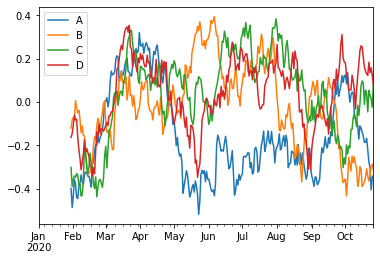

In [165]:
df.rolling(30).mean().plot()

<AxesSubplot:>

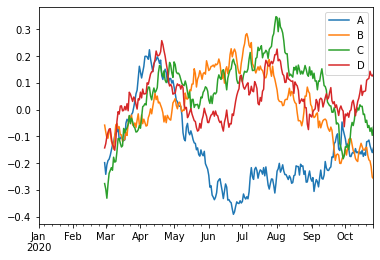

In [166]:
df.rolling(60).mean().plot()

<AxesSubplot:>

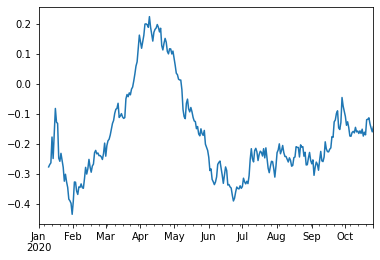

In [168]:
df.A.rolling(60, min_periods = 10).mean().plot()

<AxesSubplot:>

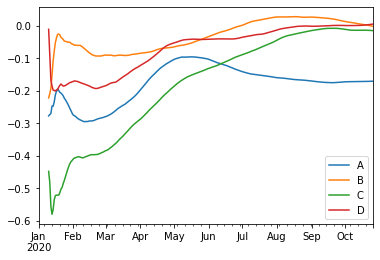

In [171]:
df.rolling(60, min_periods = 10).mean().expanding().mean().plot()

<AxesSubplot:>

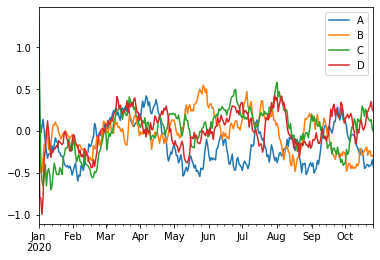

In [172]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

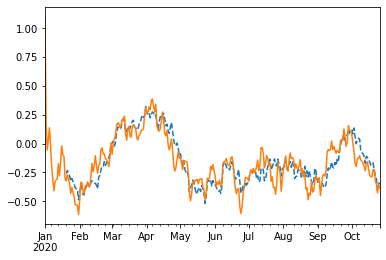

In [173]:
df.A.rolling(30, min_periods = 20).mean().plot(style = '--', label = 'Simple MA')
df.A.ewm(span = 30).mean().plot(style = '-', label = 'EWMA')

<AxesSubplot:>

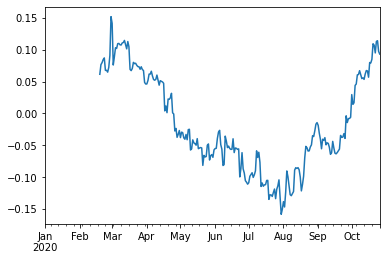

In [174]:
df.A.rolling(100, min_periods = 50).corr(df.C).plot()

<AxesSubplot:>

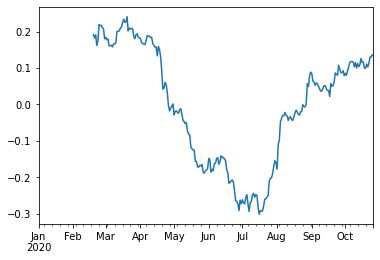

In [175]:
df.C.rolling(100, min_periods = 50).corr(df.D).plot()

# Data 읽기 및 저장

|함수|설명|
|-----|-----|
|read_csv|파일, URL, 객체로부터 구분된 데이터 읽기(기본 구분자 : ',')|
|read_table|파일, URL, 객체로부터 구분된 데이터 읽기(기본 구분자 : '\t')|
|read_fwf|고정폭 컬럼 형식에서 데이터 읽기(구분자 없는 데이터임)|
|read_clipboard|클립보드에 있는 data 읽기. 웹페이지에 있는 표를 읽어올때 유용하다.|
|read_excel|excel file(xls, xlsx)에서 표 형식 data 읽기|
|read_hdf|Pandas에서 저장한 HDFS 파일의 data 읽기|
|read_html|HTML 문서 내의 모든 Table data 읽기|
|read_json|JSON에서 data 읽기|
|read_msgpack|메시지팩 binary format으로 encoding 된 pandas data 읽기|
|read_pickle|python pickle format으로 저장된 객체 읽기|
|read_sas|SAS 시스템의 사용자 저으이 저장 format data 읽기|
|read_sql|SQL 질의 결과를 dataframe 형식으로 읽기|
|read_stata|Stata 파일에서 data 읽기|
|read_feather|Feather binary file format의 data 읽기|

## Text File 읽기 쓰기

In [176]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 20, pandas
11, 12, 13, 14, 15, csv

Writing example1.csv


In [177]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1CCB-9DB3

 C:\Users\user\Desktop\이수안컴퓨터연구소Lectures\Pandas 디렉터리

2022-01-17  오후 05:38    <DIR>          .
2022-01-17  오후 05:38    <DIR>          ..
2022-01-16  오후 09:37    <DIR>          .ipynb_checkpoints
2022-01-17  오후 05:38                89 example1.csv
2022-01-17  오후 05:38           950,524 Pandas_Functions_Practice.ipynb
               2개 파일             950,613 바이트
               3개 디렉터리  410,926,886,912 바이트 남음


In [178]:
df1 = pd.read_csv('example1.csv')

In [179]:
df1

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,20,pandas
2,11,12,13,14,15,csv


In [180]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 20, pandas
11, 12, 13, 14, 15, csv

Writing example2.csv


In [184]:
# example2 file은 header 정보 즉 column name의 정보가 없는 상황임
df2 = pd.read_csv('example2.csv', header = None)
df2.columns = ['A', 'B', 'C', 'D', 'E', 'Text']
df2

,A,B,C,D,E,Text
0,1,2,3,4,5,hi
1,6,7,8,9,20,pandas
2,11,12,13,14,15,csv


In [191]:
%%writefile example3.txt
   a   b   c  
1 2 3.2 0.3
2 0.4 2.3 1.5
3 2.4 5 3.3

Writing example3.txt


In [226]:
# 여러 공백이 포함된 txt file이라 하더라고 '\s+'로 구분자를 설정함으로써 table 형식으로 받아올 수 있었다.
df3 = pd.read_table('example3.txt', sep = '\s+')
df3

,a,b,c
1,2.0,3.2,0.3
2,0.4,2.3,1.5
3,2.4,5.0,3.3


In [227]:
df3.columns

Index(['a', 'b', 'c'], dtype='object')

In [228]:
%%writefile example4.csv
# 파일 설명
a,b,c,d,text
# 본문 내용
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example4.csv


In [229]:
# 0, 2번째 row를 무시함으로써, 주석을 무시하고 table을 들고온 것임
df4 = pd.read_csv('example4.csv', skiprows = [0, 2])
df4

,a,b,c,d,text
1,2,3,4,5,hi
6,7,8,9,10,pandas
11,12,13,14,15,csv


In [231]:
dr = pd.date_range('2020-01-01', periods = 10)
ts = pd.Series(np.arange(10), index = dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int32

In [234]:
ts.to_csv('output1.csv', header = ['Value'])

In [235]:
%%writefile example.json
[{"a" : 1, "b" : 2, "c" : 3, "d" : 4}, 
{"a" : 6, "b" : 7, "c" : 8, "d" : 9}, 
{"a" : 11, "b" : 12, "c" : 13, "d" : 14}]

Writing example.json


In [236]:
pd.read_json('example.json')

,a,b,c,d
0,1,2,3,4
1,6,7,8,9
2,11,12,13,14


In [237]:
ts.to_json('output.json')

## 이진 데이터 파일 읽기 쓰기

In [238]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,20,pandas
2,11,12,13,14,15,csv


In [239]:
df.to_pickle('df_pickle')

In [240]:
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,20,pandas
2,11,12,13,14,15,csv


In [242]:
df = pd.DataFrame({'a' : np.random.randn(100), 
                  'b' : np.random.randn(100),
                  'c' : np.random.randn(100)})
df

,a,b,c
0,0.037583,1.564353,-0.471944
1,1.067492,1.134175,0.881572
2,-0.280742,0.404597,-0.222485
3,0.184081,-0.216770,-1.669708
4,0.622553,1.105640,-0.016847
...,...,...,...
95,1.652812,-0.710393,-0.076280
96,-0.376068,1.335228,-0.700527
97,-0.466107,0.641751,-2.126237
98,0.532901,-0.430210,-0.546554


In [243]:
h = pd.HDFStore('date.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: date.h5

In [244]:
h['obj1']

,a,b,c
0,0.037583,1.564353,-0.471944
1,1.067492,1.134175,0.881572
2,-0.280742,0.404597,-0.222485
3,0.184081,-0.216770,-1.669708
4,0.622553,1.105640,-0.016847
...,...,...,...
95,1.652812,-0.710393,-0.076280
96,-0.376068,1.335228,-0.700527
97,-0.466107,0.641751,-2.126237
98,0.532901,-0.430210,-0.546554


In [245]:
h['obj1_col1']

0     0.037583
1     1.067492
2    -0.280742
3     0.184081
4     0.622553
        ...   
95    1.652812
96   -0.376068
97   -0.466107
98    0.532901
99    0.664212
Name: a, Length: 100, dtype: float64

In [246]:
h.put('obj2', df, format = 'table')
h.select('obj2', where = ['index > 50 and index <= 60'])

,a,b,c
51,-0.243572,-0.092703,0.278240
52,-0.212992,0.348593,1.274305
53,-0.215206,0.406528,0.774561
54,-1.923163,0.941019,0.532336
55,1.345521,-1.029277,0.276277
56,0.437411,1.507887,-0.522758
57,0.942554,0.709998,1.035153
58,-0.032844,-0.979956,0.233010
59,-0.255795,-0.536668,0.446712
60,-0.345905,0.025283,1.696893


In [247]:
h.close()

In [248]:
df.to_hdf('data.h5', 'obj3', format = 'table')

In [250]:
pd.read_hdf('data.h5', 'obj3', where = ['index < 10'])

,a,b,c
0,0.037583,1.564353,-0.471944
1,1.067492,1.134175,0.881572
2,-0.280742,0.404597,-0.222485
3,0.184081,-0.216770,-1.669708
4,0.622553,1.105640,-0.016847
5,-1.073440,-0.361615,1.070683
6,0.508783,-2.023422,-0.909941
7,-0.175817,-0.554172,-0.304990
8,-0.288098,0.035175,0.629877
9,-0.718311,-0.631041,0.315842


In [251]:
df.to_excel('example.xlsx', 'Sheet1')

In [252]:
pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,0.037583,1.564353,-0.471944
1,1,1.067492,1.134175,0.881572
2,2,-0.280742,0.404597,-0.222485
3,3,0.184081,-0.216770,-1.669708
4,4,0.622553,1.105640,-0.016847
...,...,...,...,...
95,95,1.652812,-0.710393,-0.076280
96,96,-0.376068,1.335228,-0.700527
97,97,-0.466107,0.641751,-2.126237
98,98,0.532901,-0.430210,-0.546554


# Data 정제

## 누락값 처리
- 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
- 서로 다른 데이터들은 다른 형태의 결측을 가짐
- 결측 데이터는 NaN, null, NA로 표기

In [253]:
# None : Python 누락 데이터

In [254]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [255]:
a.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [256]:
# NaN : 누락된 수치 데이터

In [259]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [260]:
0 + np.nan

nan

In [261]:
np.nan + np.nan

nan

In [262]:
a.max(), a.min(), a.sum()

(nan, nan, nan)

In [263]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [264]:
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

## Null 값 처리
|인자|설명|
|-----|-----|
|isnull()|누락되거나 NA인 값을 boolean 값으로 반환|
|notnull()|isnull()의 반대임|
|dropna()|누락된 데이터가 있는 축 제외|
|fillna()|누락된 값을 대체하거나 ffill이나 bfill로 보간 method 적용|

In [265]:
s = pd.Series([1, 2, np.nan, None, 'String'])
s

0         1
1         2
2       NaN
3      None
4    String
dtype: object

In [266]:
s.isnull()

0    False
1    False
2     True
3     True
4    False
dtype: bool

In [267]:
s.isnull().sum()

2

In [268]:
s.notnull()

0     True
1     True
2    False
3    False
4     True
dtype: bool

In [269]:
s.notnull().sum()

3

In [270]:
s.info()

AttributeError: 'Series' object has no attribute 'info'

In [271]:
s.dropna()

0         1
1         2
4    String
dtype: object

In [276]:
s.fillna(0)

0         1
1         2
2         0
3         0
4    String
dtype: object

In [283]:
s.fillna(method = 'ffill')

0         1
1         2
2         2
3         2
4    String
dtype: object

In [284]:
s.fillna(method = 'bfill')

0         1
1         2
2    String
3    String
4    String
dtype: object

In [279]:
df['c'] = np.nan

In [280]:
df.dropna(axis = 'columns', how = "all")

,a,b
0,0.037583,1.564353
1,1.067492,1.134175
2,-0.280742,0.404597
3,0.184081,-0.216770
4,0.622553,1.105640
...,...,...
95,1.652812,-0.710393
96,-0.376068,1.335228
97,-0.466107,0.641751
98,0.532901,-0.430210


In [281]:
df.dropna(axis = 'rows', how = 'all')

,a,b,c
0,0.037583,1.564353,NaN
1,1.067492,1.134175,NaN
2,-0.280742,0.404597,NaN
3,0.184081,-0.216770,NaN
4,0.622553,1.105640,NaN
...,...,...,...
95,1.652812,-0.710393,NaN
96,-0.376068,1.335228,NaN
97,-0.466107,0.641751,NaN
98,0.532901,-0.430210,NaN


In [282]:
df.dropna(axis = 'rows', how = 'any')

,a,b,c


In [285]:
df.fillna(df.b.mean())

,a,b,c
0,0.037583,1.564353,0.012195
1,1.067492,1.134175,0.012195
2,-0.280742,0.404597,0.012195
3,0.184081,-0.216770,0.012195
4,0.622553,1.105640,0.012195
...,...,...,...
95,1.652812,-0.710393,0.012195
96,-0.376068,1.335228,0.012195
97,-0.466107,0.641751,0.012195
98,0.532901,-0.430210,0.012195


In [287]:
df.fillna(method = 'ffill', axis = 1)

,a,b,c
0,0.037583,1.564353,1.564353
1,1.067492,1.134175,1.134175
2,-0.280742,0.404597,0.404597
3,0.184081,-0.216770,-0.216770
4,0.622553,1.105640,1.105640
...,...,...,...
95,1.652812,-0.710393,-0.710393
96,-0.376068,1.335228,1.335228
97,-0.466107,0.641751,0.641751
98,0.532901,-0.430210,-0.430210


In [289]:
df.fillna(method = 'bfill', axis = 1)

,a,b,c
0,0.037583,1.564353,NaN
1,1.067492,1.134175,NaN
2,-0.280742,0.404597,NaN
3,0.184081,-0.216770,NaN
4,0.622553,1.105640,NaN
...,...,...,...
95,1.652812,-0.710393,NaN
96,-0.376068,1.335228,NaN
97,-0.466107,0.641751,NaN
98,0.532901,-0.430210,NaN


## 중복 제거

In [302]:
df = pd.DataFrame(np.random.randint(0, 5, (1000, 5)), index = range(1000), columns = list('ABCDE'))
df

,A,B,C,D,E
0,2,0,2,3,3
1,3,0,1,0,2
2,1,3,3,1,0
3,3,2,3,3,2
4,2,3,3,4,4
...,...,...,...,...,...
995,3,1,4,1,2
996,4,1,4,0,0
997,3,0,3,4,0
998,2,3,1,1,3


In [303]:
df.duplicated().sum()

155

In [304]:
df.drop_duplicates()

,A,B,C,D,E
0,2,0,2,3,3
1,3,0,1,0,2
2,1,3,3,1,0
3,3,2,3,3,2
4,2,3,3,4,4
...,...,...,...,...,...
993,3,1,0,2,0
996,4,1,4,0,0
997,3,0,3,4,0
998,2,3,1,1,3


## 값 치환

In [311]:
s = pd.Series([1, 2, -999, 3, -999, 4])
s


0      1
1      2
2   -999
3      3
4   -999
5      4
dtype: int64

In [310]:
s[s == -999] = 0
s

0    1
1    2
2    0
3    3
4    0
5    4
dtype: int64

In [312]:
s.replace(-999, np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64